Arjun Joshi. Brainstation Capstone <br>
December, 2024<br>
Diploma Program: Data Science

In [923]:
pwd

'J:\\Brainstation\\BS Git\\Tampa_Apollo_AnthropogenicIndex\\notebooks'

![header.png](scripts/)

<html>
<style>
sup {
    vertical-align: super;
    font-size: smaller;
}
</style>
<p>
<sub><h3><center>Capstone. Case Study: Application of Anthropogenic WSM </center></h3></sub>
<sup></sup><h1> <center>DATA CLEANING, EDA & PRE-PROCESSING</
<sup><h3> .NEKTON AND BENTHIC ENVIRONMENTS. </h3></sup><center></center></h1>
</html>


**Note:** <br>

*If you have the required data and are executing the notebook, I'd do the following: <br>
Enable cell scrolling for the notebook. This makes it easier to view some output* 
*In order to do this*, 
- *select all cells (CTRL+A) outside of cell text right click and*
- *Select "Enable Scrolling For Outputs "*




### Introduction

This notebook began as dedicated notebook but has evolved into the main notebook and aggreagtes or will aggregate all dataframes. <br>
<br>
Nekton are the creature that live and swim in the open water column, including fish, seaturtles, etc and are an important representation of ecosystem heaklth. Nekton specific data provided here include:
- Standardized frequency of sampling
- Water Quality, presence of artificual compounds, species catch and counts
> This permit calculation of **Species Richness and Species Abundance**, in addition to a pre-calculated SDI (Shannon Diversity Index)
 
> Introduction of data from other notebooks are described at the time of introduction





#### Define Abbreviations

In [905]:
# Optional output commands
### See note at top of notebook


#   - View ALL ROWS
#   - View ALL COLUMNS

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

### Import Scripts

In [919]:
os.chdir('J:\\Brainstation\\BS Git\\Tampa_Apollo_AnthropogenicIndex\\notebooks')

In [921]:
%run scripts/DataDictionary.py
%run scripts/imports.py

### Functions

### Read-in Main Data & Data Cleaning

### EDA

#### Dummies

In [301]:
pwd

'J:\\Brainstation\\BS Git\\PossibleDataSources\\nekton'

In [302]:
os.chdir('J:\\Brainstation\\BS Git\\PossibleDataSources\\Benthic Index\\OG_Results')
os.listdir()

['Benthic_BioDataSpreadsheet_ActualValuesCommunityStats2.csv',
 'Benthic_BioDataSpreadsheet_AdjustedValues.csv',
 'Benthic_BioHydrology.csv',
 'Benthic_BiologyListCorrected.csv',
 'Benthic_BioSampleCollectionInfo.csv',
 'Benthic_SedimentChemistryList.csv',
 'Benthic_SedimentChemistrySpreadsheet.csv',
 'Benthic_SiltClay.csv']

In [303]:
# Read BENTHIC biodata spreadsheet
# Includes cleaned data: Shannon Diversity Index
benX = pd.read_csv('Benthic_BioDataSpreadsheet_AdjustedValues.csv',encoding='cp1252', low_memory=False)

In [304]:
 os.chdir('J:\\Brainstation\\BS Git\\PossibleDataSources\\nekton')

In [305]:
dir_list=os.listdir()

In [306]:
catch_sel=pd.read_csv('tbm_catch_selfactors.csv')

In [ ]:
benX.SampleTime=pd.to_datetime(benX.SampleTime,format='mixed')
benX

In [308]:
pwd

'J:\\Brainstation\\BS Git\\PossibleDataSources\\nekton'

In [ ]:
dir_list

In [ ]:
catch_sel.info()

In [ ]:
catch_sel

In [312]:
catch_sel.Season.unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [313]:
catch_sel['season_conv']=catch_sel.Season.map({'Spring':1,'Summer':2,'Fall':3,'Winter':4})
catch_sel.season_conv

0       4
1       4
2       4
3       4
4       4
       ..
4570    4
4571    4
4572    4
4573    4
4574    4
Name: season_conv, Length: 4575, dtype: int64

In [314]:
catch_sel.DominantVeg.fillna(0)

0                      0
1                      0
2                      0
3          Halodule spp.
4                      0
              ...       
4570                   0
4571       Halodule spp.
4572      Thalassia spp.
4573    Syringodium spp.
4574                 SAV
Name: DominantVeg, Length: 4575, dtype: object

##### Veg Dummies

In [315]:
#### Need to format data for regression

In [316]:
veg_dummies=pd.get_dummies(catch_sel.DominantVeg)

In [317]:
# Start creating dummies for veg
veg_dummies.columns.str.contains('halophila')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [318]:
for col in veg_dummies.columns:
    veg_dummies.rename(columns={col:'v_'+ col.lower().replace(" ","_")},inplace=True)
veg_dummies

v_algae  v_algae:_filamentous_green  v_algae:_filamentous_red  \
0       False                       False                     False   
1       False                       False                     False   
2       False                       False                     False   
3       False                       False                     False   
4       False                       False                     False   
...       ...                         ...                       ...   
4570    False                       False                     False   
4571    False                       False                     False   
4572    False                       False                     False   
4573    False                       False                     False   
4574    False                       False                     False   

      v_caulerpa_spp.  v_gracillaria  v_halodule_spp.  \
0               False          False            False   
1               False          False            False   
2               False          False            False   
3               False          False             True   
4               False          False            False   
...               ...            ...              ...   
4570            False          False            False   
4571            False          False             True   
4572            False          False            False   
4573            False          False            False   
4574            False          False            False   

      v_halophila_decipiens_(paddle_grass)  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   
...                                    ...   
4570                                 False   
4571                                 False   
4572                                 False   
4573                                 False   
4574                                 False   

      v_halophila_engelmanii__(star_grass)  v_halophila_spp.  v_ruppia_spp.  \
0                                    False             False          False   
1                                    False             False          False   
2                                    False             False          False   
3                                    False             False          False   
4                                    False             False          False   
...                                    ...               ...            ...   
4570                                 False             False          False   
4571                                 False             False          False   
4572                                 False             False          False   
4573                                 False             False          False   
4574                                 False             False          False   

      v_sav  v_savalg  v_sargassum_spp  v_seagrasses:_mixed  \
0     False     False            False                False   
1     False     False            False                False   
2     False     False            False                False   
3     False     False            False                False   
4     False     False            False                False   
...     ...       ...              ...                  ...   
4570  False     False            False                False   
4571  False     False            False                False   
4572  False     False            False                False   
4573  False     False            False                False   
4574   True     False            False                False   

      v_seagrasses:_unidentified  v_syringodium_spp.  v_thalassia_spp.  
0                          False               False             False  
1                          False               False           

In [319]:
# Chose halophila as column to combine for dummies
# Get columns


In [320]:
#Combine 'halophila' columns
veg_dummies.iloc[:,8]=veg_dummies.iloc[:,8]+veg_dummies.iloc[:,7]+veg_dummies.iloc[:,6]

In [321]:
# Drop combined dummy columns
veg_dummies.drop(columns=['v_halophila_decipiens_(paddle_grass)', 'v_halophila_engelmanii__(star_grass)'],inplace=True)

In [322]:
veg_dummies

v_algae  v_algae:_filamentous_green  v_algae:_filamentous_red  \
0       False                       False                     False   
1       False                       False                     False   
2       False                       False                     False   
3       False                       False                     False   
4       False                       False                     False   
...       ...                         ...                       ...   
4570    False                       False                     False   
4571    False                       False                     False   
4572    False                       False                     False   
4573    False                       False                     False   
4574    False                       False                     False   

      v_caulerpa_spp.  v_gracillaria  v_halodule_spp.  v_halophila_spp.  \
0               False          False            False             False   
1               False          False            False             False   
2               False          False            False             False   
3               False          False             True             False   
4               False          False            False             False   
...               ...            ...              ...               ...   
4570            False          False            False             False   
4571            False          False             True             False   
4572            False          False            False             False   
4573            False          False            False             False   
4574            False          False            False             False   

      v_ruppia_spp.  v_sav  v_savalg  v_sargassum_spp  v_seagrasses:_mixed  \
0             False  False     False            False                False   
1             False  False     False            False                False   
2             False  False     False            False                False   
3             False  False     False            False                False   
4             False  False     False            False                False   
...             ...    ...       ...              ...                  ...   
4570          False  False     False            False                False   
4571          False  False     False            False                False   
4572          False  False     False            False                False   
4573          False  False     False            False                False   
4574          False   True     False            False                False   

      v_seagrasses:_unidentified  v_syringodium_spp.  v_thalassia_spp.  
0                          False               False             False  
1                          False               False             False  
2                          False               False             False  
3                          False               False             False  
4                          False               False             False  
...                          ...                 ...               ...  
4570                       False               False             False  
4571                       False               False             False  
4572                       False               False              True  
4573                       False                True             False  
4574                       False               False             False  

[4575 rows x 15 columns]

##### segment dummies

In [323]:
segment_dummies=pd.get_dummies(catch_sel.TBEP_seg)

In [324]:
catch_sel.Season.value_counts()

Season
Summer    1535
Winter    1526
Fall       774
Spring     740
Name: count, dtype: int64

#### Formatting & Cleaning of Main DF (Species Catch data)

In [325]:
catch_sel[catch_sel.Reference.str.slice(-4).str.startswith('09')]

Reference  Aca_quadricornis  Ach_lineatus  Achiridae_spp  \
0     TBM1998010906                 0             0              0   
1     TBM1998010910                 0             0              0   
2     TBM1998010912                 0             0              0   
3     TBM1998010914                 0             0              0   
4     TBM1998010915                 0             0              0   
...             ...               ...           ...            ...   
4488  TBM2021070906                 0             0              0   
4522  TBM2021090904                 0             2              0   
4523  TBM2021090905                 0             4              0   
4524  TBM2021090907                 0             1              0   
4548  TBM2021110905                 0             0              0   

      Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  \
0              0             0           0              0             0   
1              0             0           0              0             0   
2              0             0           0              0             0   
3              0             0           0              0             0   
4              0             0           0              0             0   
...          ...           ...         ...            ...           ...   
4488           0             0           0              0             0   
4522           0             0           0              0             0   
4523           0             0           0              0             0   
4524           0             0           0              0             0   
4548           0             0           0              0             0   

      Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0              0             0             0             15           0   
1              0             0             0              0           0   
2              0             0             0              0           0   
3              0             0             0              0           0   
4              0             0             0              0           0   
...          ...           ...           ...            ...         ...   
4488           0             0             0              0           0   
4522           0             0             0              0           0   
4523           0             0             0              0           0   
4524           0             0             0              0           0   
4548           0             0             0              0           0   

      Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0                       0               0          0              0   
1                       0               0          0              0   
2                       0               0          0              0   
3                       0               0          0              0   
4                       0               0          0              0   
...                   ...             ...        ...            ...   
4488                    0               0          0              0   
4522                    0               0          0              0   
4523                    0               0          0              0   
4524                    0               0          0              0   
4548                    0               0          0              0   

      Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  \
0               0              0              0                0   
1               0              0              0                0   
2               0              0              0                0   
3               0              0              0                0   
4               0              0              0                0   
...           ...            ...            ...              ...   
4488            0              0      

In [326]:
catch_sel=pd.concat([catch_sel.Reference.str.slice(start=-6,stop=-4),catch_sel],axis=1)

In [327]:
catch_sel.iloc[:,0]=catch_sel.iloc[:,0].rename('month',inplace=True)

In [328]:
catch_sel.sgyear

0       1999
1       1999
2       1999
3       1999
4       1999
        ... 
4570    2022
4571    2022
4572    2022
4573    2022
4574    2022
Name: sgyear, Length: 4575, dtype: int64

In [906]:
catch_sel

month      Reference  Aca_quadricornis  Ach_lineatus  Achiridae_spp  \
0       01  TBM1998010906                 0             0              0   
1       01  TBM1998010910                 0             0              0   
2       01  TBM1998010912                 0             0              0   
3       01  TBM1998010914                 0             0              0   
4       01  TBM1998010915                 0             0              0   
...    ...            ...               ...           ...            ...   
4570    12  TBM2021120704                 0             0              0   
4571    12  TBM2021120705                 0             3              0   
4572    12  TBM2021120802                 0             0              0   
4573    12  TBM2021120804                 1             0              0   
4574    12  TBM2021120805                 0             2              0   

      Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  \
0              0             0           0              0             0   
1              0             0           0              0             0   
2              0             0           0              0             0   
3              0             0           0              0             0   
4              0             0           0              0             0   
...          ...           ...         ...            ...           ...   
4570           0             0           0              0             0   
4571           0             0           0              0             0   
4572           0             0           0              0             0   
4573           0             0           0              0             0   
4574           0             0           0              0             0   

      Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0              0             0             0             15           0   
1              0             0             0              0           0   
2              0             0             0              0           0   
3              0             0             0              0           0   
4              0             0             0              0           0   
...          ...           ...           ...            ...         ...   
4570           0             0             0              0           0   
4571           0             0             0              7           0   
4572           0             0             0              0           0   
4573           0             0             0              0           0   
4574           0             0             0              0           0   

      Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0                       0               0          0              0   
1                       0               0          0              0   
2                       0               0          0              0   
3                       0               0          0              0   
4                       0               0          0              0   
...                   ...             ...        ...            ...   
4570                    0               0          0              0   
4571                    0               0          0              0   
4572                    0               0          0              0   
4573                    0               0          0              0   
4574                    0               0          0              0   

      Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  \
0               0              0              0                0   
1               0              0              0                0   
2               0              0              0                0   
3               0              0              0                0   
4               0              0              0                0   
...           ...            

In [330]:
catch_sel.columns.values[0]='month'

In [331]:
season_dummies=pd.get_dummies(catch_sel.Season)

##### Data Formatting

In [332]:
catch_sel_vals=catch_sel.drop(columns=['Season','TBEP_seg','FLUCCSCODE'])


In [333]:
catch_sel_vals=pd.concat([catch_sel_vals,veg_dummies,season_dummies,segment_dummies],axis=1).drop(columns=['DominantVeg','season_conv'])

In [334]:
data_dic_dummies=pd.DataFrame()
column_type=pd.Series()
column_names=pd.Series()
type_count=0
name_count=0
for col in catch_sel_vals.columns:
    column_names[name_count]=col
    column_type[type_count]=catch_sel_vals[col].dtype
    type_count+=1
    name_count+=1


In [335]:
data_dic_dummies=pd.DataFrame()
data_dic_dummies['col_name']=column_names
data_dic_dummies['col_type']=column_type

In [336]:
data_dic_dummies['organism_type']=0
data_dic_dummies['organism_type']=data_dic_dummies['organism_type'].astype(str)

In [337]:
#data_dic_dummies[data_dic_dummies.col_name.str.startswith('v')==True]
data_dic_dummies.iloc[170:185,2]='aq_veg'

In [338]:
for col in catch_sel_vals.iloc[:,170:194]:
    catch_sel_vals[col]=catch_sel_vals[col].astype('int')

In [339]:
#pd.concat([catch_sel_cont,pd.get_dummies(catch_sel.TBEP_seg),pd.get_dummies(catch_sel.DominantVeg)],axis=1)

In [340]:
catch_sel_vals

month      Reference  Aca_quadricornis  Ach_lineatus  Achiridae_spp  \
0       01  TBM1998010906                 0             0              0   
1       01  TBM1998010910                 0             0              0   
2       01  TBM1998010912                 0             0              0   
3       01  TBM1998010914                 0             0              0   
4       01  TBM1998010915                 0             0              0   
...    ...            ...               ...           ...            ...   
4570    12  TBM2021120704                 0             0              0   
4571    12  TBM2021120705                 0             3              0   
4572    12  TBM2021120802                 0             0              0   
4573    12  TBM2021120804                 1             0              0   
4574    12  TBM2021120805                 0             2              0   

      Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  \
0              0             0           0              0             0   
1              0             0           0              0             0   
2              0             0           0              0             0   
3              0             0           0              0             0   
4              0             0           0              0             0   
...          ...           ...         ...            ...           ...   
4570           0             0           0              0             0   
4571           0             0           0              0             0   
4572           0             0           0              0             0   
4573           0             0           0              0             0   
4574           0             0           0              0             0   

      Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0              0             0             0             15           0   
1              0             0             0              0           0   
2              0             0             0              0           0   
3              0             0             0              0           0   
4              0             0             0              0           0   
...          ...           ...           ...            ...         ...   
4570           0             0             0              0           0   
4571           0             0             0              7           0   
4572           0             0             0              0           0   
4573           0             0             0              0           0   
4574           0             0             0              0           0   

      Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0                       0               0          0              0   
1                       0               0          0              0   
2                       0               0          0              0   
3                       0               0          0              0   
4                       0               0          0              0   
...                   ...             ...        ...            ...   
4570                    0               0          0              0   
4571                    0               0          0              0   
4572                    0               0          0              0   
4573                    0               0          0              0   
4574                    0               0          0              0   

      Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  \
0               0              0              0                0   
1               0              0              0                0   
2               0              0              0                0   
3               0              0              0                0   
4               0              0              0                0   
...           ...            

In [341]:
catch_sel.iloc[:,1].str.slice(start=3,stop=7)

0       1998
1       1998
2       1998
3       1998
4       1998
        ... 
4570    2021
4571    2021
4572    2021
4573    2021
4574    2021
Name: Reference, Length: 4575, dtype: object

##### Benthic Data

In [342]:
benX_primary=pd.concat([benX.iloc[:,0:19],benX.iloc[:,245:253]],axis=1)

In [343]:
benX_primary['month']=benX_primary.SampleTime.dt.month

In [344]:
#benX_primary=benX_primary[benX_primary.AreaAbbr.isin(['MTB','OTB','LTB','HB'])]

In [345]:
benX_primary.drop(columns=['ProgramName','FundingProject','AreaName'],inplace=True)

In [346]:
benX_primary.Year.max()

2022

In [347]:
benX_primary[abs((benX_primary['Temp-T']-benX_primary['Temp-B'])/benX_primary['Temp-T'])>0.05].month.value_counts()

month
8     228
9      94
5      44
10     41
7      22
6       4
4       2
2       1
Name: count, dtype: int64

In [348]:
#benX_sindex=benX_primary.groupby(['Year','month','StationID','Temp-T','Temp-B','AreaAbbr']).ShannonDiversity.mean().reset_index()
benX_sindex=benX_primary.groupby(['Year','month','AreaAbbr'])[['ShannonDiversity','Temp-T','Temp-B']].mean().reset_index()

In [907]:
benX_sindex.sort_values(by=['Year','month'])

Year  month AreaAbbr  ShannonDiversity     Temp-T     Temp-B       ym  \
0    1993      9       HB          0.557895  29.755263  29.806842   1993-9   
1    1993      9      LTB          0.552353  29.864118  29.557059   1993-9   
2    1993      9      MTB          0.623000  29.999000  29.735500   1993-9   
3    1993      9      OTB          0.607500  29.100000  28.949333   1993-9   
4    1993     10       MR          0.572727  26.960000  26.981818  1993-10   
..    ...    ...      ...               ...        ...        ...      ...   
392  2022      8      LTB          0.519500  30.422000  30.467500   2022-8   
393  2022      8      MTB          0.542500  30.166250  30.077500   2022-8   
394  2022      8      OTB          0.510000  30.475714  30.305714   2022-8   
395  2022      9       MR          0.618750  29.317500  28.842500   2022-9   
396  2022      9      TCB          0.650000  29.030000  29.220000   2022-9   

       yrmon  year_seq  
0     9_1993       NaN  
1     9_1993       NaN  
2     9_1993       NaN  
3     9_1993       NaN  
4    10_1993       NaN  
..       ...       ...  
392   8_2022      12.0  
393   8_2022      12.0  
394   8_2022      12.0  
395   9_2022      12.0  
396   9_2022      12.0  

[397 rows x 9 columns]

In [350]:
benX_sindex['ym']=benX_sindex.Year.astype(str)+'-'+benX_sindex.month.astype(str)

In [351]:
#sns.lineplot(x=pd.concat([benX_sindex.Year,benX_sindex.month]),y=benX_sindex.ShannonDiversity,hue=benX_sindex.AreaAbbr)

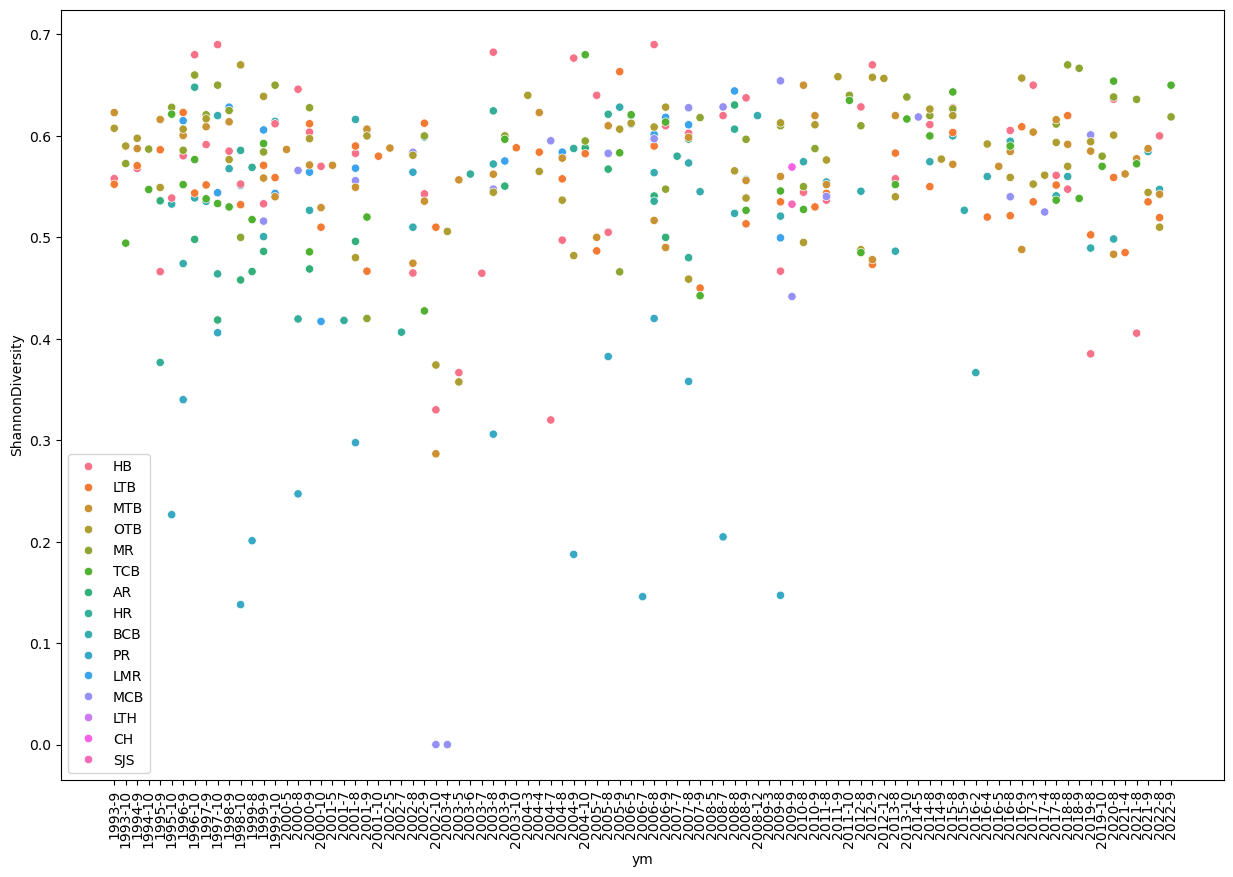

In [352]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='ym',y='ShannonDiversity',data=benX_sindex,hue='AreaAbbr')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [353]:
"""
There's going to be an issue with missing months in sampling of benthic data. There is no consistency and looking how erratic the data is already
imputation might not be the best idea.

I'm going to put this on hold and calculate the Shannon Diversity Index for the Nekton species
"""

"\nThere's going to be an issue with missing months in sampling of benthic data. There is no consistency and looking how erratic the data is already\nimputation might not be the best idea.\n\nI'm going to put this on hold and calculate the Shannon Diversity Index for the Nekton species\n"

### Nekton and Benthic ENV. : SDI, TBNI, TBBI

#### Nekton

##### Nekton Shannon Diversity Index (frequency, richness, abundance)


In [354]:
#Reorganizing
catch_sel_vals.drop(columns='sgyear',inplace=True)
catch_sel_vals.drop(columns='areas',inplace=True)
catch_sel_vals.drop(columns='month',inplace=True)
catch_sel_vals=pd.concat([catch_sel_vals,catch_sel.sgyear],axis=1)
catch_sel_vals=pd.concat([catch_sel_vals,catch_sel.areas],axis=1)
catch_sel_vals=pd.concat([catch_sel_vals,catch_sel.month],axis=1)

In [355]:
catch_sel_vals

Reference  Aca_quadricornis  Ach_lineatus  Achiridae_spp  \
0     TBM1998010906                 0             0              0   
1     TBM1998010910                 0             0              0   
2     TBM1998010912                 0             0              0   
3     TBM1998010914                 0             0              0   
4     TBM1998010915                 0             0              0   
...             ...               ...           ...            ...   
4570  TBM2021120704                 0             0              0   
4571  TBM2021120705                 0             3              0   
4572  TBM2021120802                 0             0              0   
4573  TBM2021120804                 1             0              0   
4574  TBM2021120805                 0             2              0   

      Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  \
0              0             0           0              0             0   
1              0             0           0              0             0   
2              0             0           0              0             0   
3              0             0           0              0             0   
4              0             0           0              0             0   
...          ...           ...         ...            ...           ...   
4570           0             0           0              0             0   
4571           0             0           0              0             0   
4572           0             0           0              0             0   
4573           0             0           0              0             0   
4574           0             0           0              0             0   

      Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0              0             0             0             15           0   
1              0             0             0              0           0   
2              0             0             0              0           0   
3              0             0             0              0           0   
4              0             0             0              0           0   
...          ...           ...           ...            ...         ...   
4570           0             0             0              0           0   
4571           0             0             0              7           0   
4572           0             0             0              0           0   
4573           0             0             0              0           0   
4574           0             0             0              0           0   

      Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0                       0               0          0              0   
1                       0               0          0              0   
2                       0               0          0              0   
3                       0               0          0              0   
4                       0               0          0              0   
...                   ...             ...        ...            ...   
4570                    0               0          0              0   
4571                    0               0          0              0   
4572                    0               0          0              0   
4573                    0               0          0              0   
4574                    0               0          0              0   

      Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  \
0               0              0              0                0   
1               0              0              0                0   
2               0              0              0                0   
3               0              0              0                0   
4               0              0              0                0   
...           ...            ...            ...              ...   
4570            0              0      

##### FIM Table

In [811]:
FIM=pd.read_csv('J:/Brainstation/BS Git/data/Extracted Tables/FIM_ENV_INCLUDED.csv')

In [357]:
FIM.shape

(4586, 38)

In [358]:
FIM.head(2)

Reference  StartDepth  BottomVegCover  BycatchQuantity  slope  \
0  TBM1998010906         0.6             0.0              0.0    0.0   
1  TBM1998010910         0.8             0.0              0.0    0.0   

   ScoreNumTaxa  ScoreShannon  ScoreTaxaSelect  ScoreTaxaBenthic  \
0             2             2                0                 0   
1             1             0                3                 1   

   ScoreNumGuilds  TBNI_Score  acres  Non   HA   TH  SAV  Alg   RU  \
0               5          18    0.0    1  0.0  0.0  0.0  0.0  0.0   
1               2          14    0.0    1  0.0  0.0  0.0  0.0  0.0   

   temperature  salinity  dissolvedO2  Unnamed: 21  month  year  gr  Season  \
0         19.9      13.1          5.5          NaN      1  1998  20  Winter   
1         19.6      13.4          7.1          NaN      1  1998  20  Winter   

  TBEP_seg  sgyear  FLUCCSCODE  areas  bottom DominantVeg bveg   Shore  \
0      OTB  1999.0         NaN   22.0  MudSan         NaN  Non  ManTer   
1      OTB  1999.0         NaN   21.0  MudSan         NaN  Non     Man   

  bay_TBEPseg_season bay_TBEPseg_sgyr  bay_TBEPseg_sgyr_season BvegCovBin  
0         OTB_Winter         OTB_1999  OTB_1999        _Winter       0-25  
1         OTB_Winter         OTB_1999  OTB_1999        _Winter       0-25

In [359]:
catch_sel.head(2)

month      Reference  Aca_quadricornis  Ach_lineatus  Achiridae_spp  \
0    01  TBM1998010906                 0             0              0   
1    01  TBM1998010910                 0             0              0   

   Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  \
0           0             0           0              0             0   
1           0             0           0              0             0   

   Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0           0             0             0             15           0   
1           0             0             0              0           0   

   Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  Bag_marinus  \
0                    0               0          0              0            0   
1                    0               0          0              0            0   

   Bai_chrysoura  Bat_soporator  Bathygobius_spp  Brevoortia_spp  \
0              0              0                0               0   
1              0              0                0               0   

   Cal_arctifrons  Cal_ornatus  Cal_penna  Cal_sapidus  Cal_similis  \
0               0            0          0            0            0   
1               0            0          0            0            0   

   Calamus_spp  Callinectes_spp  Car_hippos  Car_leucas  Car_limbatus  \
0            0                0           0           0             0   
1            0                0           0           0             0   

   Cen_striata  Cen_undecimalis  Cha_faber  Cha_saburrae  Chi_schoepfii  \
0            0                0          0             0              0   
1            0                0          0             0              0   

   Chl_chrysurus  Cit_macrops  Clupeidae_spp  Cte_boleosoma  Cte_smaragdus  \
0              0            0              0              0              0   
1              0            0              0              0              0   

   Cyn_arenarius  Cyn_nebulosus  Cyp_variegatus  Dac_moorei  \
0              0              0               0           0   
1              0              0               0           0   

   Dactyloscopidae_spp  Das_americana  Das_sabina  Das_say  Dia_auratus  \
0                    0              0           0        0            0   
1                    0              0           0        0            0   

   Diapterus_spp  Dip_formosum  Dip_holbrookii  Dor_petenense  \
0              0             0               0              0   
1              0             0               0              0   

   Ech_neucratoides  Elo_saurus  Elo_smithi  Elopiformes_spp  Etr_crossotus  \
0                 0           0           0                0              0   
1                 0           0           0                0              0   

   Euc_argenteus  Euc_gula  Euc_harengulus  Eucinostomus_spp  Eug_plumieri  \
0              0       0.0             0.0               0.0             0   
1              0       0.0             0.0               0.0             0   

   Far_duorarum  Flo_carpio  Fun_confluentus  Fun_grandis  Fun_similis  \
0             0           0                0            0            0   
1             1           0                0            0            0   

   Gob_bosc  Gob_longipala  Gob_robustum  Gob_strumosus  Gobiosoma_spp  \
0         0              0           0.0              0            0.0   
1         0              0           0.0              0            0.0   

   Gym_micrura  Hae_aurolineatum  Hae_plumierii  Har_jaguana  Hem_balao  \
0            0                 0              0            0          0   
1            0                 0              0            0          0   

   Hemiramphidae_spp  Hemiramphus_spp  Hip_erectus  Hip_zosterae  \
0                  0                0            0             0   
1                  0                0            0             0   

   Hippocampus_spp  Hyp_hentz  Hyp_meeki  

In [360]:
FIM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4586 entries, 0 to 4585
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reference                4586 non-null   object 
 1   StartDepth               4586 non-null   float64
 2   BottomVegCover           4559 non-null   float64
 3   BycatchQuantity          4585 non-null   float64
 4   slope                    1198 non-null   float64
 5   ScoreNumTaxa             4586 non-null   int64  
 6   ScoreShannon             4586 non-null   int64  
 7   ScoreTaxaSelect          4586 non-null   int64  
 8   ScoreTaxaBenthic         4586 non-null   int64  
 9   ScoreNumGuilds           4586 non-null   int64  
 10  TBNI_Score               4586 non-null   int64  
 11  acres                    4586 non-null   float64
 12  Non                      4586 non-null   int64  
 13  HA                       4586 non-null   float64
 14  TH                      

##### Catch Frequency 

In [361]:
#Checking for last
catch_sel.columns[176]

'season_conv'

In [362]:
# Drop non-animal species or columns
catch_freq_stage=catch_sel.drop(columns=catch_sel.columns[170:177])
catch_freq_stage

month      Reference  Aca_quadricornis  Ach_lineatus  Achiridae_spp  \
0       01  TBM1998010906                 0             0              0   
1       01  TBM1998010910                 0             0              0   
2       01  TBM1998010912                 0             0              0   
3       01  TBM1998010914                 0             0              0   
4       01  TBM1998010915                 0             0              0   
...    ...            ...               ...           ...            ...   
4570    12  TBM2021120704                 0             0              0   
4571    12  TBM2021120705                 0             3              0   
4572    12  TBM2021120802                 0             0              0   
4573    12  TBM2021120804                 1             0              0   
4574    12  TBM2021120805                 0             2              0   

      Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  \
0              0             0           0              0             0   
1              0             0           0              0             0   
2              0             0           0              0             0   
3              0             0           0              0             0   
4              0             0           0              0             0   
...          ...           ...         ...            ...           ...   
4570           0             0           0              0             0   
4571           0             0           0              0             0   
4572           0             0           0              0             0   
4573           0             0           0              0             0   
4574           0             0           0              0             0   

      Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0              0             0             0             15           0   
1              0             0             0              0           0   
2              0             0             0              0           0   
3              0             0             0              0           0   
4              0             0             0              0           0   
...          ...           ...           ...            ...         ...   
4570           0             0             0              0           0   
4571           0             0             0              7           0   
4572           0             0             0              0           0   
4573           0             0             0              0           0   
4574           0             0             0              0           0   

      Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0                       0               0          0              0   
1                       0               0          0              0   
2                       0               0          0              0   
3                       0               0          0              0   
4                       0               0          0              0   
...                   ...             ...        ...            ...   
4570                    0               0          0              0   
4571                    0               0          0              0   
4572                    0               0          0              0   
4573                    0               0          0              0   
4574                    0               0          0              0   

      Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  \
0               0              0              0                0   
1               0              0              0                0   
2               0              0              0                0   
3               0              0              0                0   
4               0              0              0                0   
...           ...            

These are not dummy variables - they are species by column and number of organism catch in any given sampling event. There are a number of columns that could be combined but that won't have any significant effect.

In [363]:
catch_freq_stage_merged=catch_freq_stage.merge(FIM, how='left', left_on=catch_sel.Reference, right_on=FIM.Reference, suffixes=('_C.sel','_FIM'))
catch_freq_stage_merged.head(5)

key_0 month_C.sel Reference_C.sel  Aca_quadricornis  Ach_lineatus  \
0  TBM1998010906          01   TBM1998010906                 0             0   
1  TBM1998010910          01   TBM1998010910                 0             0   
2  TBM1998010912          01   TBM1998010912                 0             0   
3  TBM1998010914          01   TBM1998010914                 0             0   
4  TBM1998010915          01   TBM1998010915                 0             0   

   Achiridae_spp  Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  \
0              0           0             0           0              0   
1              0           0             0           0              0   
2              0           0             0           0              0   
3              0           0             0           0              0   
4              0           0             0           0              0   

   Ana_criniger  Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  \
0             0           0             0             0             15   
1             0           0             0             0              0   
2             0           0             0             0              0   
3             0           0             0             0              0   
4             0           0             0             0              0   

   Anchoa_spp  Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0           0                    0               0          0              0   
1           0                    0               0          0              0   
2           0                    0               0          0              0   
3           0                    0               0          0              0   
4           0                    0               0          0              0   

   Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  Brevoortia_spp  \
0            0              0              0                0               0   
1            0              0              0                0               0   
2            0              0              0                0               0   
3            0              0              0                0               0   
4            0              0              0                0               0   

   Cal_arctifrons  Cal_ornatus  Cal_penna  Cal_sapidus  Cal_similis  \
0               0            0          0            0            0   
1               0            0          0            0            0   
2               0            0          0            0            0   
3               0            0          0            0            0   
4               0            0          0            0            0   

   Calamus_spp  Callinectes_spp  Car_hippos  Car_leucas  Car_limbatus  \
0            0                0           0           0             0   
1            0                0           0           0             0   
2            0                0           0           0             0   
3            0                0           0           0             0   
4            0                0           0           0             0   

   Cen_striata  Cen_undecimalis  Cha_faber  Cha_saburrae  Chi_schoepfii  \
0            0                0          0             0              0   
1            0                0          0             0              0   
2            0                0          0             0              0   
3            0                0          0             0              0   
4            0                0          0             0              0   

   Chl_chrysurus  Cit_macrops  Clupeidae_spp  Cte_boleosoma  Cte_smaragdus  \
0              0            0              0              0              0   
1              0            0              0              0              0   
2              0            0              0              0              0   
3              0            0              0     

In [364]:
#drop first 2 columns
catch_freq_stage.drop(columns=['month','Reference'],inplace=True)

In [365]:
catch_freq_stage

Aca_quadricornis  Ach_lineatus  Achiridae_spp  Adi_xenica  Aet_narinari  \
0                    0             0              0           0             0   
1                    0             0              0           0             0   
2                    0             0              0           0             0   
3                    0             0              0           0             0   
4                    0             0              0           0             0   
...                ...           ...            ...         ...           ...   
4570                 0             0              0           0             0   
4571                 0             3              0           0             0   
4572                 0             0              0           0             0   
4573                 1             0              0           0             0   
4574                 0             2              0           0             0   

      Albula_spp  Alu_schoepfii  Ana_criniger  Anc_cubana  Anc_hepsetus  \
0              0              0             0           0             0   
1              0              0             0           0             0   
2              0              0             0           0             0   
3              0              0             0           0             0   
4              0              0             0           0             0   
...          ...            ...           ...         ...           ...   
4570           0              0             0           0             0   
4571           0              0             0           0             0   
4572           0              0             0           0             0   
4573           0              0             0           0             0   
4574           0              0             0           0             0   

      Anc_lyolepis  Anc_mitchilli  Anchoa_spp  Arc_probatocephalus  \
0                0             15           0                    0   
1                0              0           0                    0   
2                0              0           0                    0   
3                0              0           0                    0   
4                0              0           0                    0   
...            ...            ...         ...                  ...   
4570             0              0           0                    0   
4571             0              7           0                    0   
4572             0              0           0                    0   
4573             0              0           0                    0   
4574             0              0           0                    0   

      Argopecten_spp  Ari_felis  Ast_y_graecum  Bag_marinus  Bai_chrysoura  \
0                  0          0              0            0              0   
1                  0          0              0            0              0   
2                  0          0              0            0              0   
3                  0          0              0            0              0   
4                  0          0              0            0              0   
...              ...        ...            ...          ...            ...   
4570               0          0              0            0              0   
4571               0          0              0            0              0   
4572               0          0              0            0              0   
4573               0          0              0            0              2   
4574               0          0              0            0              0   

      Bat_soporator  Bathygobius_spp  Brevoortia_spp  Cal_arctifrons  \
0                 0                0               0               0   
1                 0                0               0               0   
2                 0                0               0               0   
3                 0                0               0              

In [366]:
# Get proportions of nekton species, sum across row = 1
# Deal with NaN values. Will encounter div/0 errors
freq=catch_freq_stage.div(catch_freq_stage.sum(axis=1), axis=0)
freq=freq.fillna(0)
freq

Aca_quadricornis  Ach_lineatus  Achiridae_spp  Adi_xenica  Aet_narinari  \
0             0.000000      0.000000            0.0         0.0           0.0   
1             0.000000      0.000000            0.0         0.0           0.0   
2             0.000000      0.000000            0.0         0.0           0.0   
3             0.000000      0.000000            0.0         0.0           0.0   
4             0.000000      0.000000            0.0         0.0           0.0   
...                ...           ...            ...         ...           ...   
4570          0.000000      0.000000            0.0         0.0           0.0   
4571          0.000000      0.015789            0.0         0.0           0.0   
4572          0.000000      0.000000            0.0         0.0           0.0   
4573          0.020408      0.000000            0.0         0.0           0.0   
4574          0.000000      0.400000            0.0         0.0           0.0   

      Albula_spp  Alu_schoepfii  Ana_criniger  Anc_cubana  Anc_hepsetus  \
0            0.0            0.0           0.0         0.0           0.0   
1            0.0            0.0           0.0         0.0           0.0   
2            0.0            0.0           0.0         0.0           0.0   
3            0.0            0.0           0.0         0.0           0.0   
4            0.0            0.0           0.0         0.0           0.0   
...          ...            ...           ...         ...           ...   
4570         0.0            0.0           0.0         0.0           0.0   
4571         0.0            0.0           0.0         0.0           0.0   
4572         0.0            0.0           0.0         0.0           0.0   
4573         0.0            0.0           0.0         0.0           0.0   
4574         0.0            0.0           0.0         0.0           0.0   

      Anc_lyolepis  Anc_mitchilli  Anchoa_spp  Arc_probatocephalus  \
0              0.0       0.882353         0.0                  0.0   
1              0.0       0.000000         0.0                  0.0   
2              0.0       0.000000         0.0                  0.0   
3              0.0       0.000000         0.0                  0.0   
4              0.0       0.000000         0.0                  0.0   
...            ...            ...         ...                  ...   
4570           0.0       0.000000         0.0                  0.0   
4571           0.0       0.036842         0.0                  0.0   
4572           0.0       0.000000         0.0                  0.0   
4573           0.0       0.000000         0.0                  0.0   
4574           0.0       0.000000         0.0                  0.0   

      Argopecten_spp  Ari_felis  Ast_y_graecum  Bag_marinus  Bai_chrysoura  \
0                0.0        0.0            0.0          0.0       0.000000   
1                0.0        0.0            0.0          0.0       0.000000   
2                0.0        0.0            0.0          0.0       0.000000   
3                0.0        0.0            0.0          0.0       0.000000   
4                0.0        0.0            0.0          0.0       0.000000   
...              ...        ...            ...          ...            ...   
4570             0.0        0.0            0.0          0.0       0.000000   
4571             0.0        0.0            0.0          0.0       0.000000   
4572             0.0        0.0            0.0          0.0       0.000000   
4573             0.0        0.0            0.0          0.0       0.040816   
4574             0.0        0.0            0.0          0.0       0.000000   

      Bat_soporator  Bathygobius_spp  Brevoortia_spp  Cal_arctifrons  \
0               0.0              0.0             0.0             0.0   
1               0.0              0.0             0.0             0.0   
2               0.0              0.0             0.0             0.0   
3               0.0              0.0             0.0             0

**Get proportion freq for all nekton species**


In [367]:
freq.loc[1].isna()==True

Aca_quadricornis    False
Ach_lineatus        False
Achiridae_spp       False
Adi_xenica          False
Aet_narinari        False
                    ...  
Tra_carolinus       False
Tra_falcatus        False
Tri_maculatus       False
Tyl_crocodilus      False
Uro_floridana       False
Name: 1, Length: 168, dtype: bool

In [368]:
shannon= -(freq * np.log(freq)).sum(axis=1)

C:\Users\Ajax\miniconda3\envs\bs\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [369]:
shannon

0       0.362211
1      -0.000000
2      -0.000000
3       0.693147
4       1.162226
          ...   
4570    0.688567
4571    1.589084
4572    1.332179
4573    2.264088
4574    1.054920
Length: 4575, dtype: float64

In [370]:
catch_freq_stage_merged['shannon']=shannon

In [371]:
catch_freq_stage_merged.head(1)

key_0 month_C.sel Reference_C.sel  Aca_quadricornis  Ach_lineatus  \
0  TBM1998010906          01   TBM1998010906                 0             0   

   Achiridae_spp  Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  \
0              0           0             0           0              0   

   Ana_criniger  Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  \
0             0           0             0             0             15   

   Anchoa_spp  Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0           0                    0               0          0              0   

   Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  Brevoortia_spp  \
0            0              0              0                0               0   

   Cal_arctifrons  Cal_ornatus  Cal_penna  Cal_sapidus  Cal_similis  \
0               0            0          0            0            0   

   Calamus_spp  Callinectes_spp  Car_hippos  Car_leucas  Car_limbatus  \
0            0                0           0           0             0   

   Cen_striata  Cen_undecimalis  Cha_faber  Cha_saburrae  Chi_schoepfii  \
0            0                0          0             0              0   

   Chl_chrysurus  Cit_macrops  Clupeidae_spp  Cte_boleosoma  Cte_smaragdus  \
0              0            0              0              0              0   

   Cyn_arenarius  Cyn_nebulosus  Cyp_variegatus  Dac_moorei  \
0              0              0               0           0   

   Dactyloscopidae_spp  Das_americana  Das_sabina  Das_say  Dia_auratus  \
0                    0              0           0        0            0   

   Diapterus_spp  Dip_formosum  Dip_holbrookii  Dor_petenense  \
0              0             0               0              0   

   Ech_neucratoides  Elo_saurus  Elo_smithi  Elopiformes_spp  Etr_crossotus  \
0                 0           0           0                0              0   

   Euc_argenteus  Euc_gula  Euc_harengulus  Eucinostomus_spp  Eug_plumieri  \
0              0       0.0             0.0               0.0             0   

   Far_duorarum  Flo_carpio  Fun_confluentus  Fun_grandis  Fun_similis  \
0             0           0                0            0            0   

   Gob_bosc  Gob_longipala  Gob_robustum  Gob_strumosus  Gobiosoma_spp  \
0         0              0           0.0              0            0.0   

   Gym_micrura  Hae_aurolineatum  Hae_plumierii  Har_jaguana  Hem_balao  \
0            0                 0              0            0          0   

   Hemiramphidae_spp  Hemiramphus_spp  Hip_erectus  Hip_zosterae  \
0                  0                0            0             0   

   Hippocampus_spp  Hyp_hentz  Hyp_meeki  Hyp_unifasciatus  Hyporhamphus_spp  \
0                0          0          0                 0                 0   

   Lactophrys_spp  Lag_rhomboides  Lei_xanthurus  Lep_osseus  Lim_polyphemus  \
0               0               0              0           0               0   

   Lop_cyprinoides  Luc_parva  Lut_analis  Lut_griseus  Lut_synagris  \
0                0          0           0            0             0   

   Mem_martinica  Men_americanus  Men_saxatilis  Menidia_spp  Menippe_spp  \
0              0               0              0            2            0   

   Menticirrhus_spp  Mic_gulosus  Mic_thalassinus  Mic_undulatus  \
0                 0            0                0              0   

   Mon_ciliatus  Mug_cephalus  Mug_curema  Mug_trichodon  Mugil_spp  \
0             0             0           0              0          0   

   Myc_microlepis  Myr_punctatus  Nic_usta  Ogc_cubifrons  Oli_saurus  \
0               0              0         0              0           0   

   Opi_oglinum  Ops_beta  Ore_aureus  Oreo_Saroth_spp  Ort_chrysoptera  \
0            0         0           0                0                0   

   Ostraciidae_spp  Par_albigutta  Par_marmoratus  Penaeidae_spp  Pep_paru  \
0                0              0            

In [372]:
for col in catch_freq_stage_merged.columns: 
    if 'Shannon' in col:
       print(col)
    

ScoreShannon


In [373]:
catch_freq_stage_merged.shannon

0       0.362211
1      -0.000000
2      -0.000000
3       0.693147
4       1.162226
          ...   
4570    0.688567
4571    1.589084
4572    1.332179
4573    2.264088
4574    1.054920
Name: shannon, Length: 4575, dtype: float64

In [374]:
shannon_compare=catch_freq_stage_merged.groupby(['sgyear','TBEP_seg','month_C.sel'])[['shannon','ScoreShannon']].mean().reset_index()
shannon_compare.sgyear=shannon_compare.sgyear.astype(int)

In [375]:
shannon_compare['day']=1
shannon_compare.head(10)

sgyear TBEP_seg month_C.sel   shannon  ScoreShannon  day
0    1999       HB          01  0.264577      1.666667    1
1    1999       HB          02  0.203201      1.000000    1
2    1999       HB          03  0.869330      5.000000    1
3    1999       HB          04  1.433985      9.000000    1
4    1999       HB          05  0.535771      3.333333    1
5    1999       HB          06  1.384115      6.666667    1
6    1999       HB          07  1.226098      6.000000    1
7    1999       HB          08  0.519860      2.500000    1
8    1999       HB          09  0.696050      3.500000    1
9    1999       HB          10  0.691154      3.500000    1

In [376]:
shannon_compare['date']=pd.to_datetime(shannon_compare['month_C.sel']+'-'+shannon_compare.day.astype(str)+'-'+shannon_compare.sgyear.astype(str))

In [377]:
shannon_compare_HB=shannon_compare[shannon_compare.TBEP_seg=='HB']

In [378]:
shannon_compare.sgyear.unique()

array([1999, 2001, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020,
       2022])

In [379]:
shannon_compare_HB.head(15)

sgyear TBEP_seg month_C.sel   shannon  ScoreShannon  day       date
0     1999       HB          01  0.264577      1.666667    1 1999-01-01
1     1999       HB          02  0.203201      1.000000    1 1999-02-01
2     1999       HB          03  0.869330      5.000000    1 1999-03-01
3     1999       HB          04  1.433985      9.000000    1 1999-04-01
4     1999       HB          05  0.535771      3.333333    1 1999-05-01
5     1999       HB          06  1.384115      6.666667    1 1999-06-01
6     1999       HB          07  1.226098      6.000000    1 1999-07-01
7     1999       HB          08  0.519860      2.500000    1 1999-08-01
8     1999       HB          09  0.696050      3.500000    1 1999-09-01
9     1999       HB          10  0.691154      3.500000    1 1999-10-01
10    1999       HB          11  0.693147      4.000000    1 1999-11-01
11    1999       HB          12  0.288836      2.000000    1 1999-12-01
48    2001       HB          01  0.025222      0.000000    1 2001-01-01
49    2001       HB          02  0.510458      3.000000    1 2001-02-01
50    2001       HB          03  0.400278      2.333333    1 2001-03-01

<Axes: xlabel='date', ylabel='ScoreShannon'>

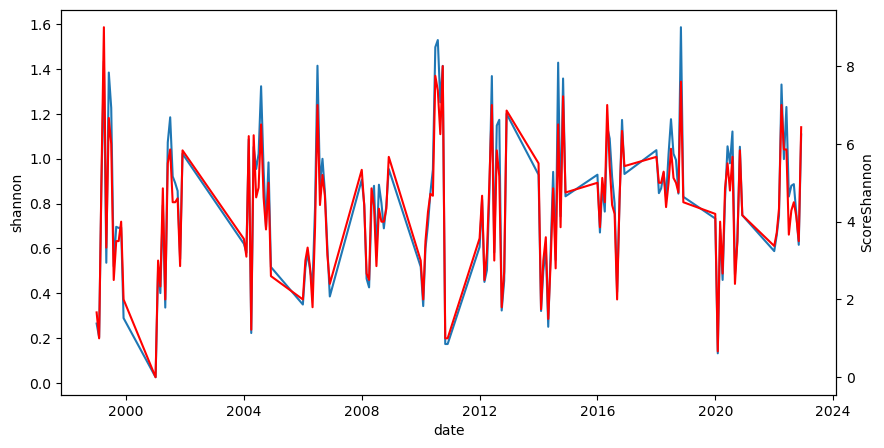

In [380]:
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='date',y='shannon',data=shannon_compare_HB,ax=ax)
ax1=ax.twinx()
sns.lineplot(x='date',y='ScoreShannon',data=shannon_compare_HB,ax=ax1, color='red')

<Axes: xlabel='shannon', ylabel='ScoreShannon'>

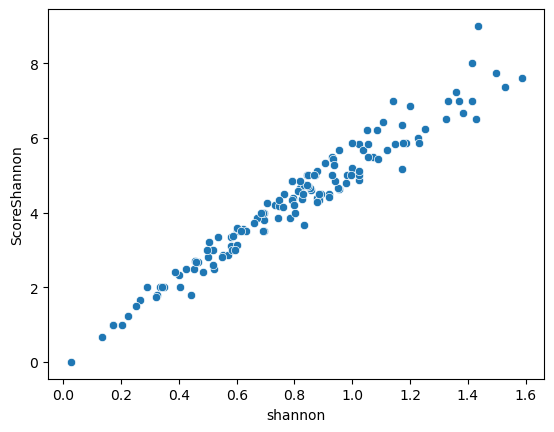

In [381]:
sns.scatterplot(x='shannon',y='ScoreShannon',data=shannon_compare_HB)

In [770]:
shannon_compare_HB.sgyear.min

<bound method Series.min of 0      1999
1      1999
2      1999
3      1999
4      1999
       ... 
535    2022
536    2022
537    2022
538    2022
539    2022
Name: sgyear, Length: 144, dtype: int32>

In [382]:
shannon_compare_HB

sgyear TBEP_seg month_C.sel   shannon  ScoreShannon  day       date
0      1999       HB          01  0.264577      1.666667    1 1999-01-01
1      1999       HB          02  0.203201      1.000000    1 1999-02-01
2      1999       HB          03  0.869330      5.000000    1 1999-03-01
3      1999       HB          04  1.433985      9.000000    1 1999-04-01
4      1999       HB          05  0.535771      3.333333    1 1999-05-01
..      ...      ...         ...       ...           ...  ...        ...
535    2022       HB          08  0.879243      4.285714    1 2022-08-01
536    2022       HB          09  0.886381      4.500000    1 2022-09-01
537    2022       HB          10  0.758715      4.142857    1 2022-10-01
538    2022       HB          11  0.615766      3.500000    1 2022-11-01
539    2022       HB          12  1.107983      6.428571    1 2022-12-01

[144 rows x 7 columns]

In [383]:
testreg=LinearRegression()
x_sh=shannon_compare_HB.drop(columns=['ScoreShannon','TBEP_seg','date'])
#x_sh=shannon_compare_HB['']
y_sh=shannon_compare_HB['ScoreShannon']
testreg.fit(x_sh,y_sh)

LinearRegression()

In [384]:
testreg.coef_

array([ 2.37867381e-03, -2.11828915e-02,  5.02067322e+00,  0.00000000e+00])

In [385]:
testreg.score(x_sh,y_sh)

0.9504064670249426

In [386]:
testreg_2=LinearRegression()
x_sh2=catch_freq_stage_merged[['TBNI_Score','ScoreTaxaBenthic','month_FIM','year','temperature','salinity']]
y_sh2=catch_freq_stage_merged['shannon']

In [387]:
x_sh2.isna().sum()

TBNI_Score          0
ScoreTaxaBenthic    0
month_FIM           0
year                0
temperature         1
salinity            6
dtype: int64

In [388]:
x_sh2.temperature=x_sh2.temperature.fillna(19.0)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\2231272123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_sh2.temperature=x_sh2.temperature.fillna(19.0)


In [389]:
x_sh2.salinity=x_sh2.salinity.fillna(x_sh2.salinity.mean())

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\1091781224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_sh2.salinity=x_sh2.salinity.fillna(x_sh2.salinity.mean())


In [390]:
x_sh2.head(3)

TBNI_Score  ScoreTaxaBenthic  month_FIM  year  temperature  salinity
0          18                 0          1  1998         19.9      13.1
1          14                 1          1  1998         19.6      13.4
2           0                 0          1  1998         19.3      13.2

In [391]:
testreg_2.fit(x_sh2,y_sh2)

LinearRegression()

In [392]:
testreg_2.score(x_sh2,y_sh2)

0.6552153998464039

In [393]:
x_sh2

TBNI_Score  ScoreTaxaBenthic  month_FIM  year  temperature  salinity
0             18                 0          1  1998         19.9      13.1
1             14                 1          1  1998         19.6      13.4
2              0                 0          1  1998         19.3      13.2
3             20                 2          1  1998         19.3      13.4
4             46                 4          1  1998         19.5      13.3
...          ...               ...        ...   ...          ...       ...
4570          30                 3         12  2021         20.5      30.0
4571          72                 9         12  2021         21.2      26.4
4572          42                 3         12  2021         20.4      27.4
4573          96                10         12  2021         22.4      24.2
4574          34                 3         12  2021         21.4      25.7

[4575 rows x 6 columns]

In [394]:
FIM['day']=1

In [395]:
FIM['date']=pd.to_datetime(FIM['month'].astype(str)+'-'+FIM.day.astype(str)+'-'+FIM.year.astype(str))

In [396]:
FIM

Reference  StartDepth  BottomVegCover  BycatchQuantity  slope  \
0     TBM1998010906         0.6             0.0              0.0    0.0   
1     TBM1998010910         0.8             0.0              0.0    0.0   
2     TBM1998010912         0.7             0.0              0.0    0.0   
3     TBM1998010914         0.9            10.0              0.0    0.0   
4     TBM1998010915         0.5             0.0              0.0    0.0   
...             ...         ...             ...              ...    ...   
4581  TBM2021120704         1.0             0.0              0.1    NaN   
4582  TBM2021120705         0.5            80.0              0.0    NaN   
4583  TBM2021120802         0.3            20.0              0.0    NaN   
4584  TBM2021120804         0.6           100.0              3.0    NaN   
4585  TBM2021120805         0.6             1.0              0.0    NaN   

      ScoreNumTaxa  ScoreShannon  ScoreTaxaSelect  ScoreTaxaBenthic  \
0                2             2                0                 0   
1                1             0                3                 1   
2                0             0                0                 0   
3                2             4                0                 2   
4                4             7                3                 4   
...            ...           ...              ...               ...   
4581             3             4                0                 3   
4582            10             9                0                 9   
4583             3             7                0                 3   
4584            10            10               10                10   
4585             3             6                0                 3   

      ScoreNumGuilds  TBNI_Score        acres  Non    HA    TH   SAV  Alg  \
0                  5          18     0.000000    1   0.0   0.0   0.0  0.0   
1                  2          14     0.000000    1   0.0   0.0   0.0  0.0   
2                  0           0     0.000000    1   0.0   0.0   0.0  0.0   
3                  2          20     0.000000    0  10.0   0.0   0.0  0.0   
4                  5          46   511.366301    1   0.0   0.0   0.0  0.0   
...              ...         ...          ...  ...   ...   ...   ...  ...   
4581               5          30     0.000000    1   0.0   0.0   0.0  0.0   
4582               8          72  2858.724318    0  64.0   8.0   8.0  0.0   
4583               8          42  1263.173174    0   0.0  20.0   0.0  0.0   
4584               8          96   533.032154    0  10.0  10.0  80.0  0.0   
4585               5          34   905.479349    0   0.0   0.5   0.5  0.0   

       RU  temperature  salinity  dissolvedO2  Unnamed: 21  month  year  gr  \
0     0.0         19.9      13.1         5.50          NaN      1  1998  20   
1     0.0         19.6      13.4         7.10          NaN      1  1998  20   
2     0.0         19.3      13.2         7.00          NaN      1  1998  20   
3     0.0         19.3      13.4         7.60          NaN      1  1998  20   
4     0.0         19.5      13.3         5.90          NaN      1  1998  20   
...   ...          ...       ...          ...          ...    ...   ...  ..   
4581  0.0         20.5      30.0         5.65          NaN     12  2021  20   
4582  0.0         21.2      26.4         6.40          NaN     12  2021  20   
4583  0.0         20.4      27.4         8.80          NaN     12  2021  20   
4584  0.0         22.4      24.2         8.70          NaN     12  2021  20   
4585  0.0         21.4      25.7         9.75          NaN     12  2021  20   

      Season TBEP_seg  sgyear  FLUCCSCODE  areas  bottom       DominantVeg  \
0     Winter      OTB  1999.0         NaN   22.0  MudSan               NaN   
1     Winter      OTB  1999.0         NaN   21.0  MudSan               NaN   
2     Winter      OTB  1999.0         NaN   21.0  MudSan               NaN   
3     Winter      OTB  1999.0         NaN   21.0  MudSan     Halodule 

#### VIF check: Checking for MultiColinearity

In [397]:
catch_sel_vals.iloc[:,170]

0       0
1       0
2       0
3       0
4       0
       ..
4570    0
4571    0
4572    0
4573    0
4574    0
Name: v_algae:_filamentous_green, Length: 4575, dtype: int32

In [398]:
non_num=[]
for i in catch_sel_vals.columns:
    if catch_sel_vals[i].dtype == 'object':
        non_num.append(i)

In [399]:
non_num

['Reference', 'month']

In [400]:
catch_sel_vals['month']=catch_sel_vals.month.astype('int')

In [401]:
catch_sel_vals.columns[168]

'Uro_floridana'

In [402]:
VIFcheck=catch_sel_vals.drop(columns=catch_sel_vals.columns[168:194])

In [403]:
VIFcheck_withconstant=sm.add_constant(VIFcheck)

In [413]:
for i in VIFcheck_withconstant.columns:
    print(VIFcheck_withconstant[i].dtype)
    print(VIFcheck_withconstant[i].dtype not in ('float64','int64'))
    print(VIFcheck_withconstant[i])

float64
False
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4570    1.0
4571    1.0
4572    1.0
4573    1.0
4574    1.0
Name: const, Length: 4575, dtype: float64
object
True
0       TBM1998010906
1       TBM1998010910
2       TBM1998010912
3       TBM1998010914
4       TBM1998010915
            ...      
4570    TBM2021120704
4571    TBM2021120705
4572    TBM2021120802
4573    TBM2021120804
4574    TBM2021120805
Name: Reference, Length: 4575, dtype: object
int64
False
0       0
1       0
2       0
3       0
4       0
       ..
4570    0
4571    0
4572    0
4573    1
4574    0
Name: Aca_quadricornis, Length: 4575, dtype: int64
int64
False
0       0
1       0
2       0
3       0
4       0
       ..
4570    0
4571    3
4572    0
4573    0
4574    2
Name: Ach_lineatus, Length: 4575, dtype: int64
int64
False
0       0
1       0
2       0
3       0
4       0
       ..
4570    0
4571    0
4572    0
4573    0
4574    0
Name: Achiridae_spp, Length: 4575, dtype: int64
i

In [414]:
VIFcheck_withconstant.drop(columns='Reference',inplace=True)

In [415]:
VIF_coef=pd.Series([variance_inflation_factor(VIFcheck_withconstant.values, i)
          for i in range(VIFcheck_withconstant.shape[1])],
         index=VIFcheck_withconstant.columns)[1:] # leaving out the constant

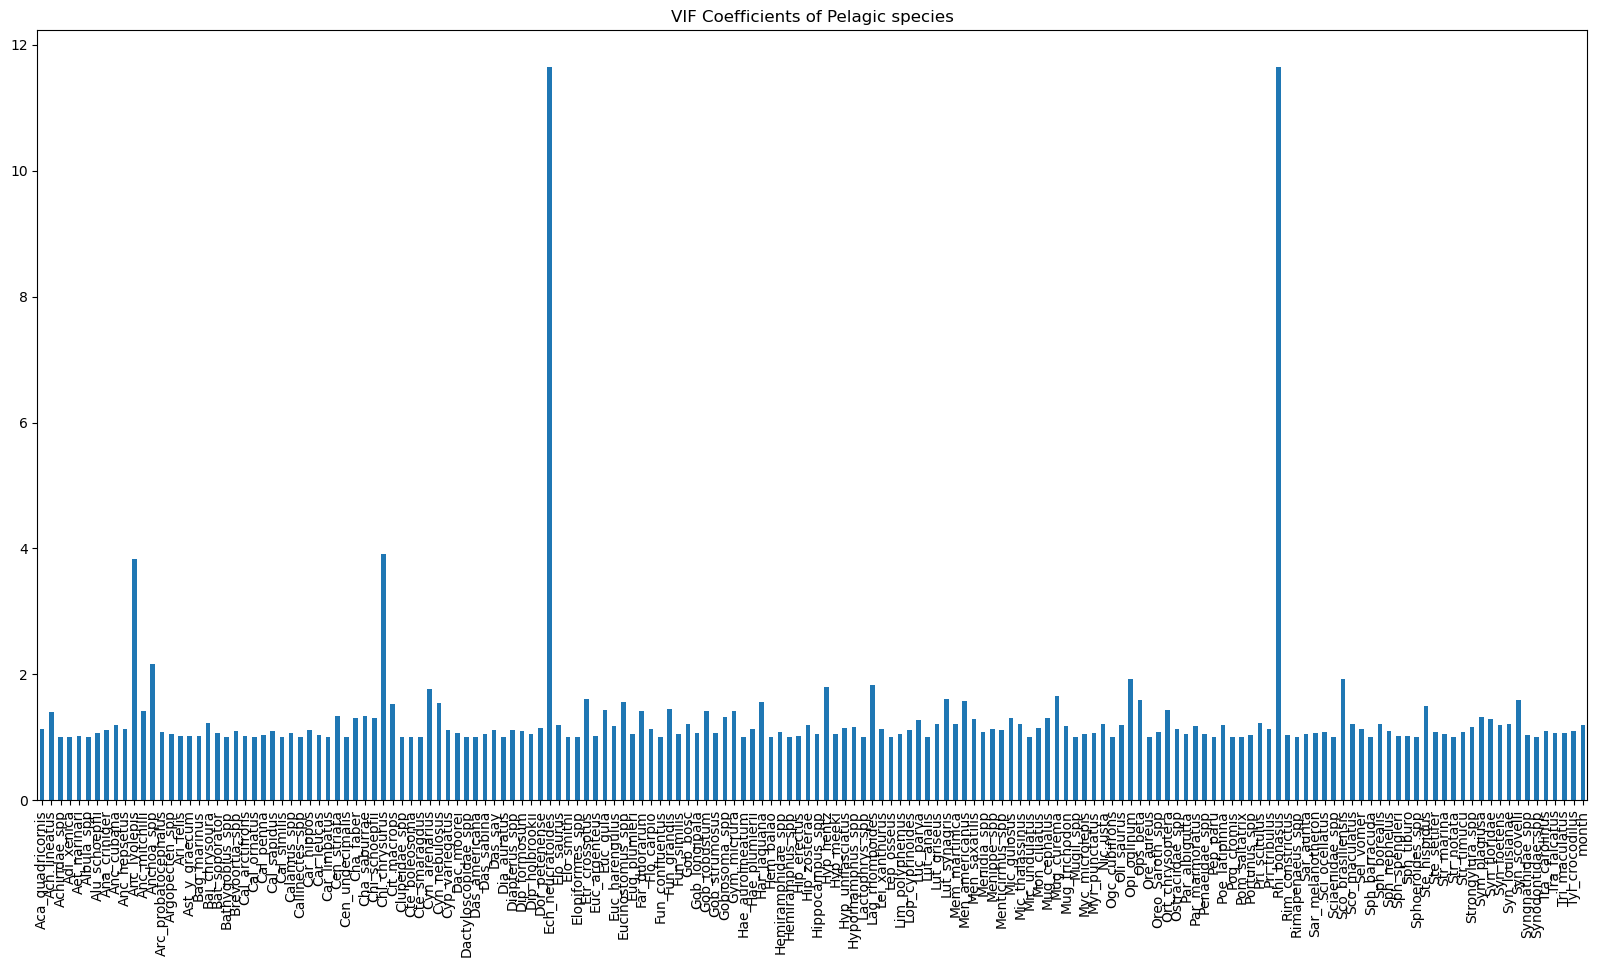

In [416]:
plt.figure(figsize=(20,10))
VIF_coef.plot(kind='bar')
plt.title('VIF Coefficients of Pelagic species')
plt.show()

In [417]:
VIF_coef[VIF_coef>3]

Anc_lyolepis         3.837028
Chl_chrysurus        3.911231
Ech_neucratoides    11.639897
Rhi_bonasus         11.647603
dtype: float64

In [418]:
multico_col=VIF_coef[VIF_coef>3]

In [419]:
multico_col.info()

<class 'pandas.core.series.Series'>
Index: 4 entries, Anc_lyolepis to Rhi_bonasus
Series name: None
Non-Null Count  Dtype  
--------------  -----  
4 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes


#### Lasso and Ridge Regression

In [420]:
multico_col

Anc_lyolepis         3.837028
Chl_chrysurus        3.911231
Ech_neucratoides    11.639897
Rhi_bonasus         11.647603
dtype: float64

In [421]:
shannon

0       0.362211
1      -0.000000
2      -0.000000
3       0.693147
4       1.162226
          ...   
4570    0.688567
4571    1.589084
4572    1.332179
4573    2.264088
4574    1.054920
Length: 4575, dtype: float64

In [422]:
multico_col=multico_col.reset_index(name='VIF_coef')

In [423]:
multico_col.rename(columns={'index': 'species'},inplace=True )

In [424]:
freq[multico_col.species].sum()

Anc_lyolepis        0.001590
Chl_chrysurus       3.105227
Ech_neucratoides    0.021739
Rhi_bonasus         4.646536
dtype: float64

In [425]:
shannon=pd.Series(shannon)

In [426]:
catch_sel_vals=pd.concat([catch_sel_vals,shannon],axis=1).rename(columns={0:'shannon'})

In [427]:
catch_sel_vals.OTB=catch_sel_vals.OTB.astype(int)

In [444]:
## Create TT-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(catch_sel_vals.drop(columns=['shannon','Reference']), catch_sel_vals.shannon, test_size=0.2, random_state=42)

In [447]:
myLasso_nekton=Lasso()
myRidge_nekton=Ridge()

In [448]:
myLasso_nekton.fit(X_train,y_train)
myRidge_nekton.fit(X_train,y_train)

Ridge()

In [449]:
myLasso_nekton.score(X_test,y_test)

0.06507661021863842

In [450]:
myRidge_nekton.score(X_test,y_test)

-2.7069034830686522

In [451]:
myLasso_nekton.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.11257000e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  4.43819512e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

#### PCA Analysis

In [453]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [454]:
from sklearn.decomposition import PCA

# Create the PCA - we will retain the same number of components as our input variables
my_pca = PCA(n_components=100)
my_pca.fit(X_train)
X_PCA=my_pca.transform(X_train)

In [455]:
my_pca3D = PCA(n_components=3)
my_pca3D.fit(X_train)
X_PCA3D=my_pca3D.transform(X_train)

In [456]:
X_PCA

array([[-0.30893289, -0.47661834,  0.34964873, ...,  0.00311358,
         0.0286419 ,  0.10319131],
       [-0.8418328 , -0.5599577 ,  0.89674082, ...,  0.04573803,
        -0.04384761,  0.10714894],
       [ 0.17641027, -0.65245307,  0.36428149, ..., -0.1397307 ,
        -0.18442215,  0.12691149],
       ...,
       [-1.40109569,  0.41963312,  2.48317399, ...,  0.27101523,
         0.15688373, -0.02924368],
       [ 0.11660483,  2.38329859, -0.31298804, ...,  0.29887122,
        -0.34172371,  0.43288061],
       [ 0.56148699, -1.10356711,  0.19491423, ..., -2.91950707,
        -1.65765755,  0.05876643]])

In [457]:
X_PCA3D

array([[-0.30893289, -0.47661834,  0.34964873],
       [-0.8418328 , -0.5599577 ,  0.89674082],
       [ 0.17641027, -0.65245307,  0.36428149],
       ...,
       [-1.40109569,  0.41963312,  2.48317399],
       [ 0.11660483,  2.38329859, -0.31298804],
       [ 0.56148699, -1.10356711,  0.19491423]])

In [458]:
my_pca.explained_variance_ratio_[0]

0.020938652756011773

In [459]:
cum_sum=0
n_components=1
for i in range(0,100):
    cum_sum=cum_sum+my_pca.explained_variance_ratio_[i]
    print(f'Number of Components: {n_components}')
    print(round(cum_sum,5))
    n_components+=1    

Number of Components: 1
0.02094
Number of Components: 2
0.03838
Number of Components: 3
0.05189
Number of Components: 4
0.06485
Number of Components: 5
0.07676
Number of Components: 6
0.08798
Number of Components: 7
0.09893
Number of Components: 8
0.10949
Number of Components: 9
0.11964
Number of Components: 10
0.1297
Number of Components: 11
0.13941
Number of Components: 12
0.14905
Number of Components: 13
0.15839
Number of Components: 14
0.16738
Number of Components: 15
0.17623
Number of Components: 16
0.1849
Number of Components: 17
0.19344
Number of Components: 18
0.20166
Number of Components: 19
0.20974
Number of Components: 20
0.21763
Number of Components: 21
0.2254
Number of Components: 22
0.23314
Number of Components: 23
0.24077
Number of Components: 24
0.24832
Number of Components: 25
0.25582
Number of Components: 26
0.26324
Number of Components: 27
0.2706
Number of Components: 28
0.27788
Number of Components: 29
0.28513
Number of Components: 30
0.29229
Number of Components: 3

__Doing the rest of the PCA seems like it won't provide much information. 20 components only explains 21.7%.<br>
When 100 components were calculated, it still didn't reach 70% <br>
However, a 3D plot of the first 3 PC does look a lot more relevant than non-scaled data.__

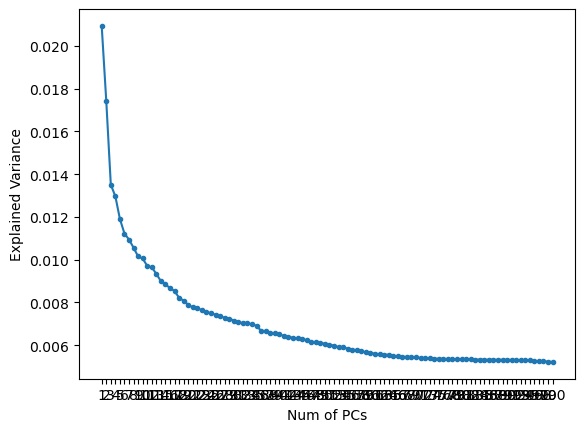

In [460]:
plt.figure()
plt.plot(np.arange(100)+1, my_pca.explained_variance_ratio_, marker = '.')
plt.xticks(np.arange(100)+1)
plt.ylabel('Explained Variance')
plt.xlabel('Num of PCs')
plt.show()

In [461]:
PCA3D = pd.DataFrame(data=X_PCA3D, columns=['PC1', 'PC2', 'PC3'])

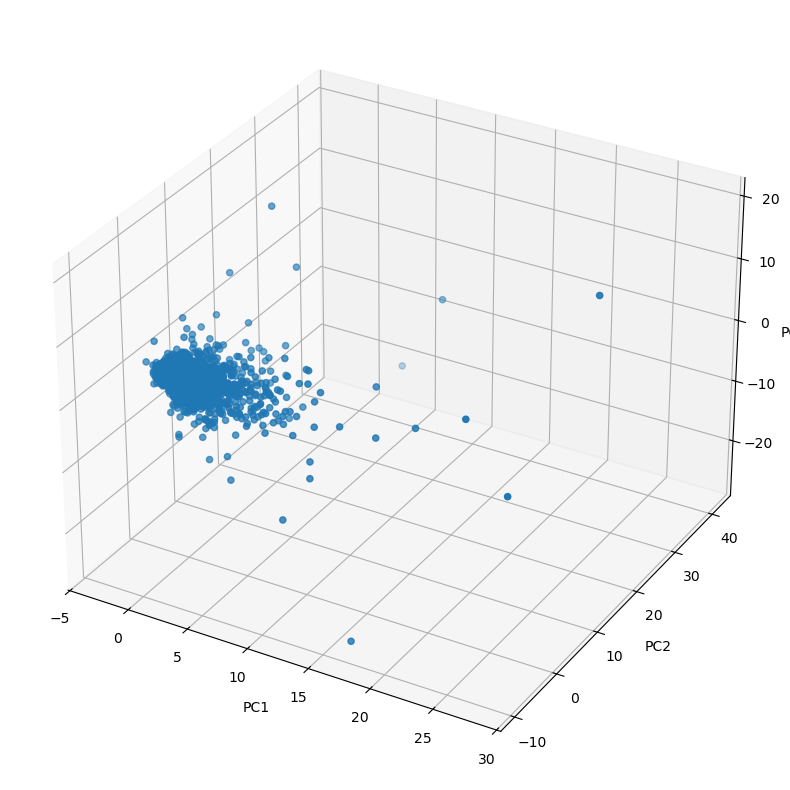

In [462]:
fig = plt.figure(figsize=(10,10,))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA3D['PC1'], PCA3D['PC2'], PCA3D['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [463]:
import plotly.express as px
fig=plt.figure(figsize=(10,10))
fig = px.scatter_3d(PCA3D, x='PC1', y='PC2', z='PC3')
fig.show()

<Figure size 1000x1000 with 0 Axes>

In [464]:
my_pca3D = PCA(n_components=3)
my_pca3D.fit(X_train)
X_PCA3D=my_pca3D.transform(X_train)

In [465]:
X_PCA

array([[-0.30893289, -0.47661834,  0.34964873, ...,  0.00311358,
         0.0286419 ,  0.10319131],
       [-0.8418328 , -0.5599577 ,  0.89674082, ...,  0.04573803,
        -0.04384761,  0.10714894],
       [ 0.17641027, -0.65245307,  0.36428149, ..., -0.1397307 ,
        -0.18442215,  0.12691149],
       ...,
       [-1.40109569,  0.41963312,  2.48317399, ...,  0.27101523,
         0.15688373, -0.02924368],
       [ 0.11660483,  2.38329859, -0.31298804, ...,  0.29887122,
        -0.34172371,  0.43288061],
       [ 0.56148699, -1.10356711,  0.19491423, ..., -2.91950707,
        -1.65765755,  0.05876643]])

In [466]:
"""
Before scaling, it looked like onlt 100 components explained 70% of the data.
"""

'\nBefore scaling, it looked like onlt 100 components explained 70% of the data.\n'

In [474]:
my_pca5 = PCA(n_components=5)
my_pca5.fit(X_train)
X_PCA5=my_pca5.transform(catch_sel_vals.drop(columns=['shannon','Reference']))

C:\Users\Ajax\miniconda3\envs\bs\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but PCA was fitted without feature names



In [475]:
X_PCA5

array([[  -8.84132463,  -72.04857644,   24.41794395,   15.22130717,
        -105.24072356],
       [ -11.69969393,  -72.01970132,   23.44692998,   11.82410624,
        -105.32094301],
       [ -11.95796118,  -71.9885351 ,   23.46822794,   11.85790268,
        -105.28396478],
       ...,
       [ -10.58564569,  -71.45117253,   18.9158919 ,   13.21633614,
        -107.18561537],
       [  -1.57158295,  -71.74449648,   23.01137899,    9.69493869,
        -107.61706131],
       [ -10.04163576,  -72.10984277,   19.30175926,   13.00086305,
        -107.397504  ]])

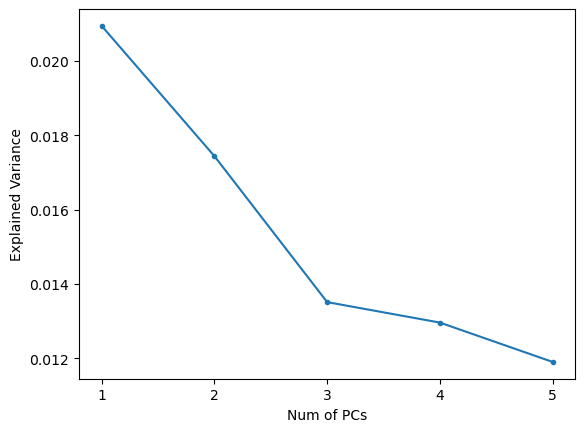

In [476]:
plt.figure()
plt.plot(np.arange(5)+1, my_pca5.explained_variance_ratio_, marker = '.')
plt.xticks(np.arange(5)+1)
plt.ylabel('Explained Variance')
plt.xlabel('Num of PCs')
plt.show()

In [477]:
X_PCA5_df=pd.DataFrame(X_PCA5, columns=['PCA-1', 'PCA-2','PCA-3','PCA-4','PCA-5'])

In [478]:
X_PCA5_df['shannon']=catch_sel_vals['shannon']

In [479]:
X_PCA5_df['shannon']=catch_sel_vals['shannon']

In [480]:
X_PCA5_df.isna().sum()

PCA-1      0
PCA-2      0
PCA-3      0
PCA-4      0
PCA-5      0
shannon    0
dtype: int64

In [481]:
PCA_DF=pd.DataFrame(X_PCA)

E = H / ln(k)

In [482]:
PCA_DF

0         1         2         3         4         5         6   \
0    -0.308933 -0.476618  0.349649  0.191866 -1.785849 -0.985952  1.122404   
1    -0.841833 -0.559958  0.896741 -0.031808 -1.146423 -0.390878  0.941004   
2     0.176410 -0.652453  0.364281  0.141683 -1.877140 -0.763791  1.242154   
3     3.656058  0.289633 -0.587287  0.351396  0.601617 -0.178661 -0.835515   
4    -0.515210 -0.474863  0.999580 -0.263418 -1.061424  0.089011  1.259735   
...        ...       ...       ...       ...       ...       ...       ...   
3655 -1.284300 -0.854882 -0.674557  0.329640  0.458601  1.650842 -0.368383   
3656  1.311556 -0.425976  1.294120  1.479143 -0.356651 -0.862878  1.120130   
3657 -1.401096  0.419633  2.483174 -0.647417  0.451281 -0.180340  0.919461   
3658  0.116605  2.383299 -0.312988  0.252599 -0.637617 -1.015291 -0.190752   
3659  0.561487 -1.103567  0.194914 -0.069377 -0.524571 -2.392723  0.059724   

            7         8         9         10        11        12        13  \
0    -0.372437  0.715060  1.228702  0.099491 -0.533815  0.801407  0.534738   
1    -0.407312 -0.058475  0.268552  0.126869 -0.178081  0.606403  0.232469   
2    -0.398787  1.268786  1.183527 -0.114388 -0.687343  0.323542  0.432063   
3     0.260069 -0.833645 -0.078295 -0.586002  0.728714 -0.451767  0.195930   
4    -0.427233  0.290696  0.214030  0.157475 -0.145120  0.121264  0.651943   
...        ...       ...       ...       ...       ...       ...       ...   
3655  0.106964 -0.153091 -0.704780  0.350762 -0.176405  0.743090 -0.837221   
3656 -0.746443  0.138638 -0.942982  0.410515  0.617705  0.731466 -0.149374   
3657 -0.437235 -0.623478  0.331238  0.386683 -0.999269  0.241061 -0.370433   
3658  0.251335 -0.374158  2.479262 -0.953274 -1.510505  0.267621  0.131506   
3659 -0.495280 -0.498590 -0.463197 -0.082855 -0.156545  0.673783 -0.439649   

            14        15        16        17        18        19        20  \
0    -0.065486 -0.006209 -0.161581 -0.421623  0.375557 -0.048991 -0.118383   
1    -0.624172  0.403635  0.142310 -0.722718  0.201641  0.019218  0.129736   
2     0.277398 -0.007594 -0.498539 -0.651025  0.188313  0.036013 -0.245692   
3    -0.329379  0.383505 -0.436391 -0.386380 -0.589526 -0.159688  1.305853   
4    -0.288586  0.075889 -0.335249 -0.943513 -0.348165  0.248877  0.313590   
...        ...       ...       ...       ...       ...       ...       ...   
3655 -0.261839  0.489432  0.462084 -0.707157 -0.588907 -0.032911 -0.201684   
3656  0.112003  0.233171  0.408733 -0.167796  0.013494  0.706942 -0.509657   
3657 -0.835163  0.966087  0.162798 -0.183041  0.532277 -0.560867  0.386086   
3658  0.341225 -0.011404  1.141220  0.170613  0.951991 -1.702165  0.124342   
3659 -0.691482  1.374956  0.204471 -1.174928  0.830186  1.152317  0.424414   

            21        22        23        24        25        26        27  \
0    -0.072136 -0.119300 -0.066016 -0.295599  0.232768 -0.097675 -0.325940   
1    -0.175963 -0.002318 -0.005876  0.029107  0.104582 -0.222276  0.045649   
2    -0.147651 -0.125853 -0.271418 -0.260044  0.239182  0.065086 -0.124125   
3     0.190374 -0.635322  0.107928 -0.378967  0.902077  0.282491  0.755937   
4    -0.584559  0.249810  0.070702 -0.392544  0.251897  0.187601 -0.095048   
...        ...       ...       ...       ...       ...       ...       ...   
3655  0.134128 -0.268097 -0.262483  0.126557 -0.370280 -0.633183  1.211996   
3656  0.030657  0.570205 -0.836813 -0.371781  0.073325  0.955018  0.012468   
3657 -0.406979  0.081226  0.229619  0.515114 -0.078797 -0.286868  0.122870   
3658 -0.888938 -0.000808  0.441271  0.683992 -0.528455 -0.158059 -0.510569   
3659  0.912750  0.860364 -0.341155 -0.979269  0.738909  1.010391  0.002017   

            28        29        30        31        32        33        34  \
0    -0.112290  0.227413 -0.149723  0.110059 -0.043511  0.067253 -0.101489   
1     0.103187  0.051903  0.098381 -0.326721  0.092098  0.051318  0.084240   
2     0.046011 -0.060210 -0.21

In [483]:
my_pca.explained_variance_ratio_

array([0.02093865, 0.01743772, 0.01351384, 0.01296366, 0.01190606,
       0.01122407, 0.01094361, 0.01055977, 0.01015256, 0.0100578 ,
       0.00970787, 0.00964545, 0.00933558, 0.00899738, 0.00884683,
       0.00867228, 0.00853647, 0.00821578, 0.00808214, 0.00788865,
       0.0077692 , 0.00774816, 0.00762503, 0.00754837, 0.00750593,
       0.00742204, 0.00735219, 0.0072861 , 0.00724879, 0.00715303,
       0.00707325, 0.00703842, 0.00702898, 0.00697908, 0.00691017,
       0.00667312, 0.00665155, 0.00656241, 0.00655305, 0.00650364,
       0.00643847, 0.00639537, 0.00635067, 0.00631802, 0.00628814,
       0.0062402 , 0.00615903, 0.00613374, 0.00612131, 0.00606627,
       0.00603118, 0.00598058, 0.00591421, 0.0059112 , 0.00583802,
       0.00579595, 0.00576945, 0.00573959, 0.005661  , 0.00563824,
       0.00561095, 0.00557392, 0.00556439, 0.00555316, 0.00551145,
       0.00547441, 0.00546365, 0.00545409, 0.00543318, 0.00542712,
       0.00540927, 0.00538715, 0.00538193, 0.00537283, 0.00536

In [484]:
X_train_PCA=my_pca.transform(X_train)

In [485]:
X_test_PCA=my_pca.transform(X_test)

In [486]:
from sklearn.linear_model import LinearRegression
LinReg=LinearRegression()
LinReg.fit(X_train_PCA,y_train)

LinearRegression()

In [487]:
y_pred_train=LinReg.predict(X_train_PCA)

In [488]:
y_pred_train=LinReg.predict(X_test_PCA)

In [489]:
LinReg.score(X_train_PCA,y_train)

0.25350355413809744

In [490]:
#Results
# n_components =20, score= 0.195
# n_components = 100, score=0.2535

Nitrates and Phosphates

In [501]:
pwd

'J:\\Brainstation\\Capstone Git\\data\\human Imact'

In [502]:
os.chdir('J:\\Brainstation\\BS Git\\human Imact')

In [503]:
NP_Means=pd.read_csv('nitrate_phosphate_totals_1990_2024.csv')

In [606]:
NP_Means

Unnamed: 0  year  month      ym       Nit  ActivityDepth   Latitude  \
0             0  1990      1  1990_1  0.682750       2.319250  27.795134   
1             1  1990      2  1990_2  0.847750       2.451250  27.792931   
2             2  1990      3  1990_3  0.641500       2.362000  27.792931   
3             3  1990      4  1990_4  0.630976       2.224878  27.794969   
4             4  1990      5  1990_5  0.676829       2.543902  27.794969   
..          ...   ...    ...     ...       ...            ...        ...   
411         411  2024      4  2024_4  0.442958       2.052083  27.795194   
412         412  2024      5  2024_5  0.330565       2.039130  27.800788   
413         413  2024      6  2024_6  0.355957       2.219565  27.800788   
414         414  2024      7  2024_7  0.182000       2.494118  27.778137   
415         415  2024      8  2024_8  0.189706       2.612353  27.778137   

     Longitude  pyear  pmonth pResultUnit      Phos    p_ym  day  
0   -82.504102   1990       1        mg/l  0.525385  1990_1    1  
1   -82.504449   1990       2        mg/l  0.534000  1990_2    1  
2   -82.504449   1990       3        mg/l  0.469091  1990_3    1  
3   -82.502239   1990       4        mg/l  0.529375  1990_4    1  
4   -82.502239   1990       5        mg/l  0.649000  1990_5    1  
..         ...    ...     ...         ...       ...     ...  ...  
411 -82.496064   2024       4        mg/l  0.129429  2024_4    1  
412 -82.493325   2024       5        mg/l  0.111750  2024_5    1  
413 -82.493325   2024       6        mg/l  0.112889  2024_6    1  
414 -82.513610   2024       7        mg/l  0.124333  2024_7    1  
415 -82.513610   2024       8        mg/l  0.342667  2024_8    1  

[416 rows x 14 columns]

In [504]:
NP_Means['day']=1

In [505]:
os.chdir('J:\\Brainstation\\Capstone Git\\data\\human Imact')

In [506]:
NP_Means

Unnamed: 0  year  month      ym  ResultValue2  ActivityDepth   Latitude  \
0             0  1990      1  1990_1      0.682750       2.319250  27.795134   
1             1  1990      2  1990_2      0.847750       2.451250  27.792931   
2             2  1990      3  1990_3      0.641500       2.362000  27.792931   
3             3  1990      4  1990_4      0.630976       2.224878  27.794969   
4             4  1990      5  1990_5      0.676829       2.543902  27.794969   
..          ...   ...    ...     ...           ...            ...        ...   
411         411  2024      4  2024_4      0.442958       2.052083  27.795194   
412         412  2024      5  2024_5      0.330565       2.039130  27.800788   
413         413  2024      6  2024_6      0.355957       2.219565  27.800788   
414         414  2024      7  2024_7      0.182000       2.494118  27.778137   
415         415  2024      8  2024_8      0.189706       2.612353  27.778137   

     Longitude  pyear  pmonth pResultUnit      Phos    p_ym  day  
0   -82.504102   1990       1        mg/l  0.525385  1990_1    1  
1   -82.504449   1990       2        mg/l  0.534000  1990_2    1  
2   -82.504449   1990       3        mg/l  0.469091  1990_3    1  
3   -82.502239   1990       4        mg/l  0.529375  1990_4    1  
4   -82.502239   1990       5        mg/l  0.649000  1990_5    1  
..         ...    ...     ...         ...       ...     ...  ...  
411 -82.496064   2024       4        mg/l  0.129429  2024_4    1  
412 -82.493325   2024       5        mg/l  0.111750  2024_5    1  
413 -82.493325   2024       6        mg/l  0.112889  2024_6    1  
414 -82.513610   2024       7        mg/l  0.124333  2024_7    1  
415 -82.513610   2024       8        mg/l  0.342667  2024_8    1  

[416 rows x 14 columns]

In [507]:
NP_Means.rename(columns={'ResultValue2':'Nit'},inplace=True)

In [508]:
NP_Means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     416 non-null    int64  
 1   year           416 non-null    int64  
 2   month          416 non-null    int64  
 3   ym             416 non-null    object 
 4   Nit            416 non-null    float64
 5   ActivityDepth  416 non-null    float64
 6   Latitude       416 non-null    float64
 7   Longitude      416 non-null    float64
 8   pyear          416 non-null    int64  
 9   pmonth         416 non-null    int64  
 10  pResultUnit    416 non-null    object 
 11  Phos           416 non-null    float64
 12  p_ym           416 non-null    object 
 13  day            416 non-null    int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 45.6+ KB


In [509]:
NP_means=NP_Means.iloc[:,[1,2,3,4,11,5,6,7]]

In [510]:
NP_means

year  month      ym       Nit      Phos  ActivityDepth   Latitude  \
0    1990      1  1990_1  0.682750  0.525385       2.319250  27.795134   
1    1990      2  1990_2  0.847750  0.534000       2.451250  27.792931   
2    1990      3  1990_3  0.641500  0.469091       2.362000  27.792931   
3    1990      4  1990_4  0.630976  0.529375       2.224878  27.794969   
4    1990      5  1990_5  0.676829  0.649000       2.543902  27.794969   
..    ...    ...     ...       ...       ...            ...        ...   
411  2024      4  2024_4  0.442958  0.129429       2.052083  27.795194   
412  2024      5  2024_5  0.330565  0.111750       2.039130  27.800788   
413  2024      6  2024_6  0.355957  0.112889       2.219565  27.800788   
414  2024      7  2024_7  0.182000  0.124333       2.494118  27.778137   
415  2024      8  2024_8  0.189706  0.342667       2.612353  27.778137   

     Longitude  
0   -82.504102  
1   -82.504449  
2   -82.504449  
3   -82.502239  
4   -82.502239  
..         ...  
411 -82.496064  
412 -82.493325  
413 -82.493325  
414 -82.513610  
415 -82.513610  

[416 rows x 8 columns]

In [511]:
catch_freq_stage_merged.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021], dtype=int64)

<Axes: >

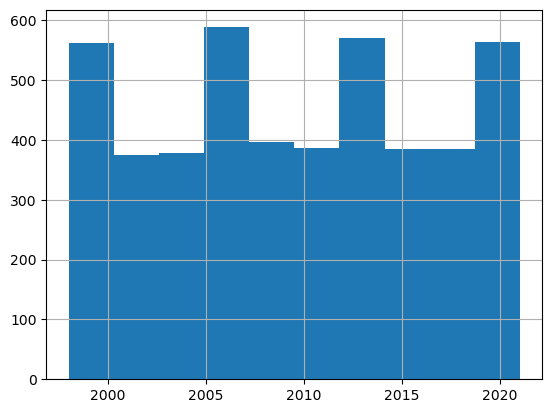

In [512]:
FIM.year.hist()

In [513]:
"""
Key Tables:
NP_means
"""

'\nKey Tables:\nNP_means\n'

In [514]:
catch_sel_vals

Reference  Aca_quadricornis  Ach_lineatus  Achiridae_spp  \
0     TBM1998010906                 0             0              0   
1     TBM1998010910                 0             0              0   
2     TBM1998010912                 0             0              0   
3     TBM1998010914                 0             0              0   
4     TBM1998010915                 0             0              0   
...             ...               ...           ...            ...   
4570  TBM2021120704                 0             0              0   
4571  TBM2021120705                 0             3              0   
4572  TBM2021120802                 0             0              0   
4573  TBM2021120804                 1             0              0   
4574  TBM2021120805                 0             2              0   

      Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  \
0              0             0           0              0             0   
1              0             0           0              0             0   
2              0             0           0              0             0   
3              0             0           0              0             0   
4              0             0           0              0             0   
...          ...           ...         ...            ...           ...   
4570           0             0           0              0             0   
4571           0             0           0              0             0   
4572           0             0           0              0             0   
4573           0             0           0              0             0   
4574           0             0           0              0             0   

      Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0              0             0             0             15           0   
1              0             0             0              0           0   
2              0             0             0              0           0   
3              0             0             0              0           0   
4              0             0             0              0           0   
...          ...           ...           ...            ...         ...   
4570           0             0             0              0           0   
4571           0             0             0              7           0   
4572           0             0             0              0           0   
4573           0             0             0              0           0   
4574           0             0             0              0           0   

      Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0                       0               0          0              0   
1                       0               0          0              0   
2                       0               0          0              0   
3                       0               0          0              0   
4                       0               0          0              0   
...                   ...             ...        ...            ...   
4570                    0               0          0              0   
4571                    0               0          0              0   
4572                    0               0          0              0   
4573                    0               0          0              0   
4574                    0               0          0              0   

      Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  \
0               0              0              0                0   
1               0              0              0                0   
2               0              0              0                0   
3               0              0              0                0   
4               0              0              0                0   
...           ...            ...            ...              ...   
4570            0              0      

In [515]:
ym=catch_sel_vals.sgyear.astype(str)+'_'+catch_sel_vals.month.astype(str)

In [516]:
ym.unique()

array(['1999_1', '1999_2', '1999_3', '1999_4', '1999_5', '1999_6',
       '1999_7', '1999_8', '1999_9', '1999_10', '1999_11', '1999_12',
       '2001_1', '2001_2', '2001_3', '2001_4', '2001_5', '2001_6',
       '2001_7', '2001_8', '2001_9', '2001_10', '2001_11', '2001_12',
       '2004_1', '2004_2', '2004_3', '2004_4', '2004_5', '2004_6',
       '2004_7', '2004_8', '2004_9', '2004_10', '2004_11', '2004_12',
       '2006_1', '2006_2', '2006_3', '2006_4', '2006_5', '2006_6',
       '2006_7', '2006_8', '2006_9', '2006_10', '2006_11', '2006_12',
       '2008_1', '2008_2', '2008_3', '2008_4', '2008_5', '2008_6',
       '2008_7', '2008_8', '2008_9', '2008_10', '2008_11', '2008_12',
       '2010_1', '2010_2', '2010_3', '2010_4', '2010_5', '2010_6',
       '2010_7', '2010_8', '2010_9', '2010_10', '2010_11', '2010_12',
       '2012_1', '2012_2', '2012_3', '2012_4', '2012_5', '2012_6',
       '2012_7', '2012_8', '2012_9', '2012_10', '2012_11', '2012_12',
       '2014_1', '2014_2', '2014_3', '201

In [517]:
catch_sel_vals.sgyear.unique()

array([1999, 2001, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020,
       2022], dtype=int64)

** Sampling intervals for benthic data was not even. Data is taken both seasonally and at 2-3 year interals.
  This willmake it harder to draw direct comparisons with other datasets. **

In [518]:


vals_1999=catch_sel_vals[catch_sel_vals['sgyear']==1999]

In [519]:
SDI_means=catch_sel_vals.groupby(['month','sgyear']).shannon.mean().reset_index().sort_values(by=['sgyear','month'])

In [789]:
SDI_means

month  sgyear   shannon
0        1    1999  0.489115
12       2    1999  0.859081
24       3    1999  0.825866
36       4    1999  0.783379
48       5    1999  0.894913
..     ...     ...       ...
95       8    2022  0.985419
107      9    2022  1.037126
119     10    2022  0.909193
131     11    2022  0.818095
143     12    2022  1.055173

[144 rows x 3 columns]

In [521]:
years=SDI_means.sgyear.unique()

In [522]:
SDI_means_2=SDI_means.copy()
SDI_means_2.head(3)

month  sgyear   shannon
0       1    1999  0.489115
12      2    1999  0.859081
24      3    1999  0.825866

In [523]:
ddyear_counter=1

In [524]:
SDI_means_2.sgyear=SDI_means_2.sgyear.map({
    1999:1,
    2001:2,
    2004:3,
    2006:4,
    2008:5,
    2010:6,
    2012:7,
    2014:8,
    2016:9,
    2018:10,
    2020:11,
    2022:12
    })

In [525]:
SDI_means_2

month  sgyear   shannon
0        1       1  0.489115
12       2       1  0.859081
24       3       1  0.825866
36       4       1  0.783379
48       5       1  0.894913
..     ...     ...       ...
95       8      12  0.985419
107      9      12  1.037126
119     10      12  0.909193
131     11      12  0.818095
143     12      12  1.055173

[144 rows x 3 columns]

In [526]:
SDI_means_2

month  sgyear   shannon
0        1       1  0.489115
12       2       1  0.859081
24       3       1  0.825866
36       4       1  0.783379
48       5       1  0.894913
..     ...     ...       ...
95       8      12  0.985419
107      9      12  1.037126
119     10      12  0.909193
131     11      12  0.818095
143     12      12  1.055173

[144 rows x 3 columns]

<Axes: xlabel='month', ylabel='shannon'>

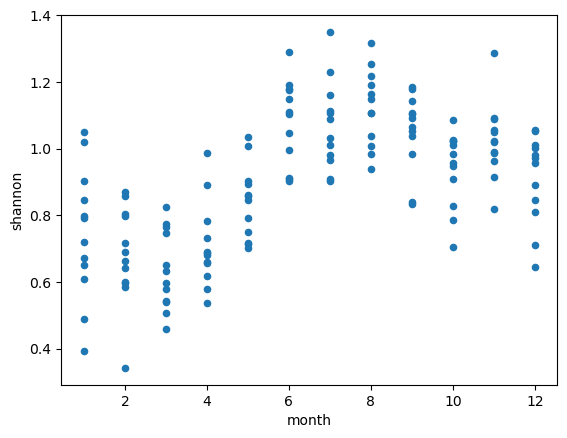

In [527]:
SDI_means.plot('month','shannon',kind='scatter')

In [528]:
monthly_average_sdi=SDI_means.groupby('month').shannon.mean()

In [529]:
monthly_average=pd.DataFrame(monthly_average_sdi.reset_index())
monthly_average

month   shannon
0       1  0.745361
1       2  0.680621
2       3  0.635257
3       4  0.708820
4       5  0.840306
5       6  1.080407
6       7  1.071142
7       8  1.122901
8       9  1.052118
9      10  0.940210
10     11  1.024737
11     12  0.911063

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\1446467906.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\1446467906.py:6: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



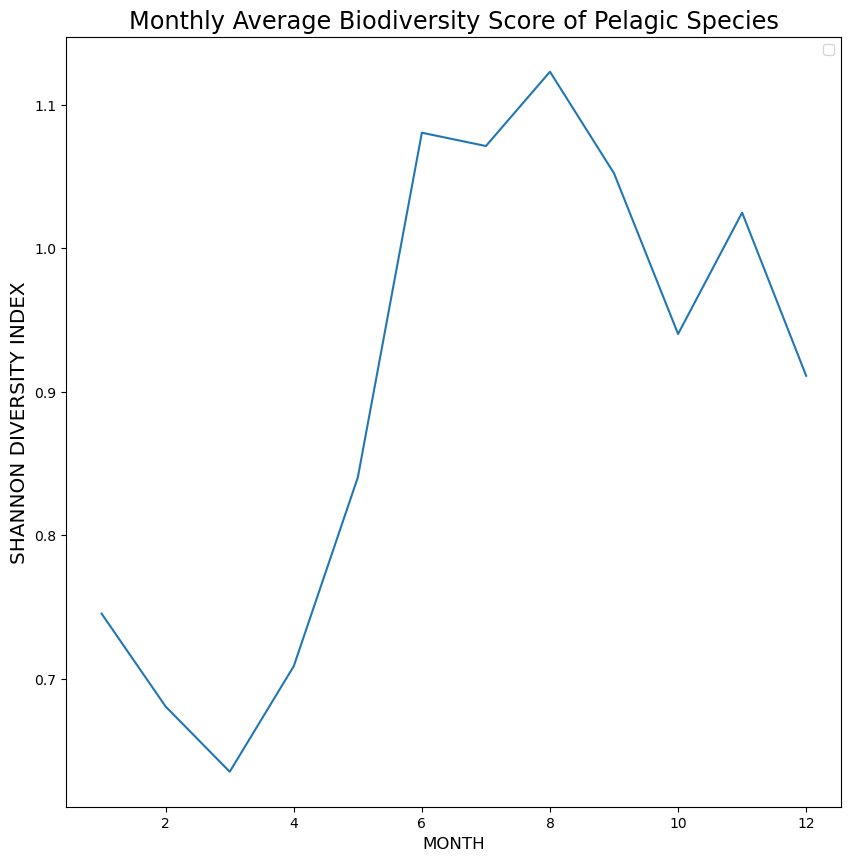

In [530]:
plt.figure(figsize=(10,10))
sns.lineplot(x='month',y='shannon',data=monthly_average,palette='viridis')
plt.title('Monthly Average Biodiversity Score of Pelagic Species',fontsize='xx-large')
plt.xlabel('MONTH',fontsize='large')
plt.ylabel('SHANNON DIVERSITY INDEX', fontsize='x-large')
plt.legend()
plt.show()

Matching up SDI values from Nekton with Benthic SDI valiues

In [531]:
SDI_means_2['monthyr']=SDI_means_2.month.astype(str)+'_'+SDI_means_2.sgyear.astype(str)
SDI_means_2['ym']=SDI_means_2.sgyear.astype(str)+'_'+SDI_means_2.month.astype(str)
SDI_means_2

month  sgyear   shannon monthyr     ym
0        1       1  0.489115     1_1    1_1
12       2       1  0.859081     2_1    1_2
24       3       1  0.825866     3_1    1_3
36       4       1  0.783379     4_1    1_4
48       5       1  0.894913     5_1    1_5
..     ...     ...       ...     ...    ...
95       8      12  0.985419    8_12   12_8
107      9      12  1.037126    9_12   12_9
119     10      12  0.909193   10_12  12_10
131     11      12  0.818095   11_12  12_11
143     12      12  1.055173   12_12  12_12

[144 rows x 5 columns]

In [532]:
# Have to match on separate years

In [533]:
benX_match_nekton=benX_sindex[benX_sindex.Year.isin(years)]

In [534]:
benX_match_nekton

Year  month AreaAbbr  ShannonDiversity     Temp-T     Temp-B      ym
73   1999      8       AR          0.466296  29.028519  29.180000  1999-8
74   1999      8       HR          0.569000  28.804500  29.049500  1999-8
75   1999      8       PR          0.201000  30.941000  30.619500  1999-8
76   1999      8      TCB          0.517500  31.500000  31.250000  1999-8
77   1999      9       AR          0.486154  29.002308  29.672308  1999-9
..    ...    ...      ...               ...        ...        ...     ...
392  2022      8      LTB          0.519500  30.422000  30.467500  2022-8
393  2022      8      MTB          0.542500  30.166250  30.077500  2022-8
394  2022      8      OTB          0.510000  30.475714  30.305714  2022-8
395  2022      9       MR          0.618750  29.317500  28.842500  2022-9
396  2022      9      TCB          0.650000  29.030000  29.220000  2022-9

[167 rows x 7 columns]

In [535]:
# Map sampling years to a simple sequence format in order to create a continuous plot
# Although this might demonstrate a pattern, it's unlikely this data can applied to a time series analysis
benX_match_nekton['year_seq']=benX_match_nekton.Year.map({
    1999:1,
    2001:2,
    2004:3,
    2006:4,
    2008:5,
    2010:6,
    2012:7,
    2014:8,
    2016:9,
    2018:10,
    2020:11,
    2022:12
    })

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\4148177043.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [536]:
benX_match_nekton

Year  month AreaAbbr  ShannonDiversity     Temp-T     Temp-B      ym  \
73   1999      8       AR          0.466296  29.028519  29.180000  1999-8   
74   1999      8       HR          0.569000  28.804500  29.049500  1999-8   
75   1999      8       PR          0.201000  30.941000  30.619500  1999-8   
76   1999      8      TCB          0.517500  31.500000  31.250000  1999-8   
77   1999      9       AR          0.486154  29.002308  29.672308  1999-9   
..    ...    ...      ...               ...        ...        ...     ...   
392  2022      8      LTB          0.519500  30.422000  30.467500  2022-8   
393  2022      8      MTB          0.542500  30.166250  30.077500  2022-8   
394  2022      8      OTB          0.510000  30.475714  30.305714  2022-8   
395  2022      9       MR          0.618750  29.317500  28.842500  2022-9   
396  2022      9      TCB          0.650000  29.030000  29.220000  2022-9   

     year_seq  
73          1  
74          1  
75          1  
76          1  
77          1  
..        ...  
392        12  
393        12  
394        12  
395        12  
396        12  

[167 rows x 8 columns]

In [537]:
#year_seq=pd.Series()

In [538]:
year_seq=benX_match_nekton['year_seq'].astype(int)

In [539]:
benX_match_nekton['year_seq_month']=benX_match_nekton.year_seq.astype(str)+'_'+benX_match_nekton.month.astype(str)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\3808030496.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [540]:
benX_AreaMean=benX_match_nekton.groupby(['Year','month','year_seq_month']).ShannonDiversity.mean().reset_index()

In [541]:
benX_AreaMean.head(3)

Year  month year_seq_month  ShannonDiversity
0  1999      8            1_8          0.438449
1  1999      9            1_9          0.558688
2  1999     10           1_10          0.586418

In [542]:
benX_yrmonth=benX_match_nekton.year_seq.astype(str)+'_'+benX_match_nekton.month.astype(str)

In [543]:
benX_match_nekton.head(3)

Year  month AreaAbbr  ShannonDiversity     Temp-T   Temp-B      ym  \
73  1999      8       AR          0.466296  29.028519  29.1800  1999-8   
74  1999      8       HR          0.569000  28.804500  29.0495  1999-8   
75  1999      8       PR          0.201000  30.941000  30.6195  1999-8   

    year_seq year_seq_month  
73         1            1_8  
74         1            1_8  
75         1            1_8

In [544]:
benX_AreaMean

Year  month year_seq_month  ShannonDiversity
0   1999      8            1_8          0.438449
1   1999      9            1_9          0.558688
2   1999     10           1_10          0.586418
3   2001      5            2_5          0.571034
4   2001      7            2_7          0.418125
5   2001      8            2_8          0.532607
6   2001      9            2_9          0.536389
7   2001     10           2_10          0.580000
8   2004      3            3_3          0.640000
9   2004      4            3_4          0.590667
10  2004      7            3_7          0.457600
11  2004      8            3_8          0.555614
12  2004      9            3_9          0.483438
13  2004     10           3_10          0.611414
14  2006      5            4_5          0.616250
15  2006      7            4_7          0.145833
16  2006      8            4_8          0.566423
17  2006      9            4_9          0.562225
18  2008      5            5_5               NaN
19  2008      7            5_7          0.484444
20  2008      8            5_8          0.594124
21  2008      9            5_9          0.560845
22  2008     12           5_12          0.620000
23  2010      8            6_8          0.570213
24  2010      9            6_9          0.587125
25  2012      8            7_8          0.551377
26  2012      9            7_9          0.569778
27  2012     12           7_12          0.656667
28  2014      5            8_5          0.618667
29  2014      8            8_8          0.597447
30  2014      9            8_9          0.577143
31  2016      2            9_2          0.366667
32  2016      4            9_4          0.557333
33  2016      5            9_5          0.570000
34  2016      8            9_8          0.572788
35  2016      9            9_9          0.584667
36  2018      8           10_8          0.593194
37  2018      9           10_9          0.602500
38  2020      8           11_8          0.581430
39  2022      8           12_8          0.543855
40  2022      9           12_9          0.634375

Introducting Nitrates and Phosphates and matching with benthic data

In [545]:
#############
NP_means
#############
## Sequencing years for Nit-Phos

year  month      ym       Nit      Phos  ActivityDepth   Latitude  \
0    1990      1  1990_1  0.682750  0.525385       2.319250  27.795134   
1    1990      2  1990_2  0.847750  0.534000       2.451250  27.792931   
2    1990      3  1990_3  0.641500  0.469091       2.362000  27.792931   
3    1990      4  1990_4  0.630976  0.529375       2.224878  27.794969   
4    1990      5  1990_5  0.676829  0.649000       2.543902  27.794969   
..    ...    ...     ...       ...       ...            ...        ...   
411  2024      4  2024_4  0.442958  0.129429       2.052083  27.795194   
412  2024      5  2024_5  0.330565  0.111750       2.039130  27.800788   
413  2024      6  2024_6  0.355957  0.112889       2.219565  27.800788   
414  2024      7  2024_7  0.182000  0.124333       2.494118  27.778137   
415  2024      8  2024_8  0.189706  0.342667       2.612353  27.778137   

     Longitude  
0   -82.504102  
1   -82.504449  
2   -82.504449  
3   -82.502239  
4   -82.502239  
..         ...  
411 -82.496064  
412 -82.493325  
413 -82.493325  
414 -82.513610  
415 -82.513610  

[416 rows x 8 columns]

In [546]:
NP_means['year_seq']=NP_means.year.map({
    1999:1,
    2001:2,
    2004:3,
    2006:4,
    2008:5,
    2010:6,
    2012:7,
    2014:8,
    2016:9,
    2018:10,
    2020:11,
    2022:12
    })

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\3799716401.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [547]:
##Create a matching table for Nekton/Benthic
NP_match=NP_means[NP_means.year.isin(years)]

In [548]:
print(NP_match.shape)
print(SDI_means_2.shape)
benX_AreaMean.shape

(144, 9)
(144, 5)


(41, 4)

In [549]:
benX_sindex.Year.value_counts().count()

30

In [550]:
# formatting for matching
NP_match.year_seq=NP_match.year_seq.astype(int)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\3603738672.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [551]:
NP_match['ym_seq']=NP_match.year_seq.astype(str)+'_'+NP_match.month.astype(str)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\1873409731.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [552]:
NP_match.reset_index(drop=True,inplace=True)
SDI_means_2.reset_index(drop=True,inplace=True)
NP_match

year  month       ym       Nit      Phos  ActivityDepth   Latitude  \
0    1999      1   1999_1  0.642960  0.155000       1.430417  27.818557   
1    1999      2   1999_2  0.516667  0.217500       0.971111  27.812085   
2    1999      3   1999_3  0.589455  0.227500       0.881905  27.803355   
3    1999      4   1999_4  0.621739  0.248571       1.461739  27.823980   
4    1999      5   1999_5  0.725000  0.171818       1.437778  27.816501   
..    ...    ...      ...       ...       ...            ...        ...   
139  2022      8   2022_8  0.413314  0.121000       1.568571  27.798501   
140  2022      9   2022_9  0.440909  0.241167       1.513636  27.798483   
141  2022     10  2022_10  0.349529  0.376714       1.497059  27.790141   
142  2022     11  2022_11  0.515480  0.114714       1.782000  27.804925   
143  2022     12  2022_12  0.402571  0.157556       1.410000  27.796729   

     Longitude  year_seq ym_seq  
0   -82.497083         1    1_1  
1   -82.487398         1    1_2  
2   -82.518752         1    1_3  
3   -82.498598         1    1_4  
4   -82.488693         1    1_5  
..         ...       ...    ...  
139 -82.522758        12   12_8  
140 -82.520057        12   12_9  
141 -82.519279        12  12_10  
142 -82.486603        12  12_11  
143 -82.521432        12  12_12  

[144 rows x 10 columns]

In [610]:
NP_nekton=pd.concat([NP_match,SDI_means_2.shannon],axis=1)
NP_nekton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           144 non-null    int64  
 1   month          144 non-null    int64  
 2   ym             144 non-null    object 
 3   Nit            144 non-null    float64
 4   Phos           144 non-null    float64
 5   ActivityDepth  144 non-null    float64
 6   Latitude       144 non-null    float64
 7   Longitude      144 non-null    float64
 8   year_seq       144 non-null    int32  
 9   ym_seq         144 non-null    object 
 10  shannon        144 non-null    float64
dtypes: float64(6), int32(1), int64(2), object(2)
memory usage: 11.9+ KB


In [611]:
NP_nekton.index=NP_nekton.ym

In [612]:
NP_nekton.head(2)

year  month      ym       Nit    Phos  ActivityDepth   Latitude  \
ym                                                                        
1999_1  1999      1  1999_1  0.642960  0.1550       1.430417  27.818557   
1999_2  1999      2  1999_2  0.516667  0.2175       0.971111  27.812085   

        Longitude  year_seq ym_seq   shannon  
ym                                            
1999_1 -82.497083         1    1_1  0.489115  
1999_2 -82.487398         1    1_2  0.859081

In [613]:
NP_nekton['day']=1

In [616]:
NP_nekton['date_format']=pd.to_datetime(NP_nekton.month.astype('str')+'-'+NP_nekton.day.astype('str')+'-'+NP_nekton.year.astype('str'))

In [623]:
NP_nekton.head()

year  month      ym       Nit      Phos  ActivityDepth   Latitude  \
1999-01-01  1999      1  1999_1  0.642960  0.155000       1.430417  27.818557   
1999-02-01  1999      2  1999_2  0.516667  0.217500       0.971111  27.812085   
1999-03-01  1999      3  1999_3  0.589455  0.227500       0.881905  27.803355   
1999-04-01  1999      4  1999_4  0.621739  0.248571       1.461739  27.823980   
1999-05-01  1999      5  1999_5  0.725000  0.171818       1.437778  27.816501   

            Longitude  year_seq ym_seq   shannon  day date_format  
1999-01-01 -82.497083         1    1_1  0.489115    1  1999-01-01  
1999-02-01 -82.487398         1    1_2  0.859081    1  1999-02-01  
1999-03-01 -82.518752         1    1_3  0.825866    1  1999-03-01  
1999-04-01 -82.498598         1    1_4  0.783379    1  1999-04-01  
1999-05-01 -82.488693         1    1_5  0.894913    1  1999-05-01

In [622]:
NP_nekton.index=NP_nekton.date_format

In [625]:
NP_nekton=NP_nekton.iloc[:,[3,4,10]]

In [627]:
NP_nekton.head(2)

Nit    Phos   shannon
1999-01-01  0.642960  0.1550  0.489115
1999-02-01  0.516667  0.2175  0.859081

In [628]:
NP_means.head(2)

year  month      ym      Nit      Phos  ActivityDepth   Latitude  \
0  1990      1  1990_1  0.68275  0.525385        2.31925  27.795134   
1  1990      2  1990_2  0.84775  0.534000        2.45125  27.792931   

   Longitude  year_seq date_format  
0 -82.504102       NaN  1990-01-01  
1 -82.504449       NaN  1990-02-01

In [629]:
import scipy.stats as stats
stats.ttest_rel(NP_means.Nit,NP_means.Phos)

TtestResult(statistic=26.69831956761394, pvalue=3.967183052940055e-92, df=415)

<Axes: >

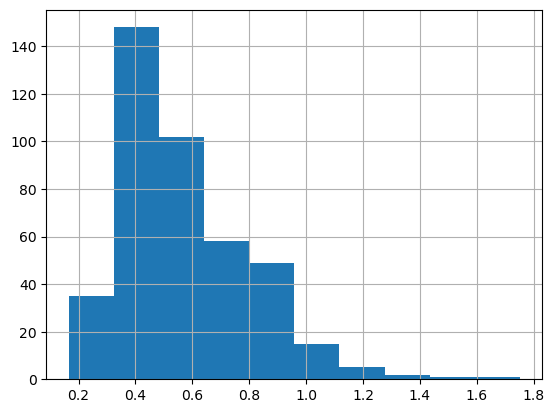

In [630]:
NP_means.Nit.hist()

<Axes: >

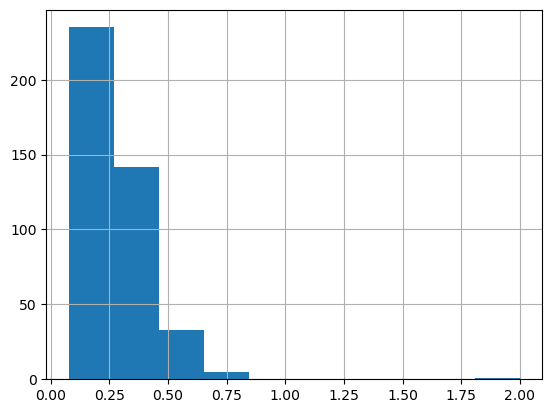

In [631]:
NP_means.Phos.hist()

In [632]:
Nitdecomp=pd.DataFrame(data=NP_means.Nit,index=NP_means.date_format)

In [633]:
Nitdecomp.Nit=NP_means.Nit

In [634]:
NP_means.Nit

0      0.682750
1      0.847750
2      0.641500
3      0.630976
4      0.676829
         ...   
411    0.442958
412    0.330565
413    0.355957
414    0.182000
415    0.189706
Name: Nit, Length: 416, dtype: float64

In [635]:
NP_means.Phos

0      0.525385
1      0.534000
2      0.469091
3      0.529375
4      0.649000
         ...   
411    0.129429
412    0.111750
413    0.112889
414    0.124333
415    0.342667
Name: Phos, Length: 416, dtype: float64

In [636]:
decomp_N=pd.DataFrame(data=NP_means.Nit,index=NP_means.date_format)
decomp_P=pd.DataFrame(data=NP_means.Phos,index=NP_means.date_format)
decomp_N.index.name=''
decomp_P.index.name=''

In [637]:
decomp_N=NP_means.Nit.to_frame()
decomp_P=NP_means.Phos.to_frame()

In [638]:
decomp_P.index=NP_means.date_format
decomp_P

Phos
date_format          
1990-01-01   0.525385
1990-02-01   0.534000
1990-03-01   0.469091
1990-04-01   0.529375
1990-05-01   0.649000
...               ...
2024-04-01   0.129429
2024-05-01   0.111750
2024-06-01   0.112889
2024-07-01   0.124333
2024-08-01   0.342667

[416 rows x 1 columns]

In [639]:
#decomp_P.drop(columns=['trend','residual','seasonal'],inplace=True)

KeyError: "['trend', 'residual', 'seasonal'] not found in axis"

In [641]:
decomp_P

Phos
date_format          
1990-01-01   0.525385
1990-02-01   0.534000
1990-03-01   0.469091
1990-04-01   0.529375
1990-05-01   0.649000
...               ...
2024-04-01   0.129429
2024-05-01   0.111750
2024-06-01   0.112889
2024-07-01   0.124333
2024-08-01   0.342667

[416 rows x 1 columns]

In [642]:
decomp_N.index=NP_means.date_format
decomp_N.index.name=''
decomp_N

Nit
                    
1990-01-01  0.682750
1990-02-01  0.847750
1990-03-01  0.641500
1990-04-01  0.630976
1990-05-01  0.676829
...              ...
2024-04-01  0.442958
2024-05-01  0.330565
2024-06-01  0.355957
2024-07-01  0.182000
2024-08-01  0.189706

[416 rows x 1 columns]

In [643]:
#decomp_P.drop(columns=['trend','residual','seasonal'],inplace=True)
decomp_P

Phos
date_format          
1990-01-01   0.525385
1990-02-01   0.534000
1990-03-01   0.469091
1990-04-01   0.529375
1990-05-01   0.649000
...               ...
2024-04-01   0.129429
2024-05-01   0.111750
2024-06-01   0.112889
2024-07-01   0.124333
2024-08-01   0.342667

[416 rows x 1 columns]

In [650]:
#decomp_N.drop(columns=['trend','residual','seasonal'],inplace=True)
decomp_N

Nit  seasonal  trend  residual
                                               
1990-01-01  0.682750  0.820513    NaN       NaN
1990-02-01  0.847750  0.886040    NaN       NaN
1990-03-01  0.641500  0.931119    NaN       NaN
1990-04-01  0.630976  0.958353    NaN       NaN
1990-05-01  0.676829  0.958778    NaN       NaN
...              ...       ...    ...       ...
2024-04-01  0.442958  0.958353    NaN       NaN
2024-05-01  0.330565  0.958778    NaN       NaN
2024-06-01  0.355957  1.072969    NaN       NaN
2024-07-01  0.182000  1.088559    NaN       NaN
2024-08-01  0.189706  1.157999    NaN       NaN

[416 rows x 4 columns]

In [645]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [646]:
decomposition_N=seasonal_decompose(decomp_N,model='multiplicative')
decomposition_P=seasonal_decompose(decomp_P,model='multiplicative')

In [647]:
decomp_P['seasonal']=decomposition_P.seasonal
decomp_P['trend']=decomposition_P.trend
decomp_P['residual']=decomposition_P.resid

In [648]:
decomp_N['seasonal']=decomposition_N.seasonal
decomp_N['trend']=decomposition_N.trend
decomp_N['residual']=decomposition_N.resid

In [649]:
cols = ["trend", "seasonal", "residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=decomp_N.index, y=decomp_N[col],name='Nitrates'),
        row=i+1,
        col=1
    )
    fig.add_trace(
        go.Scatter(x=decomp_P.index, y=decomp_P[col],name='Phosphates'),
        row=i+1,
        col=1
    )

fig.update_layout(
    height=700,
    width=1000,
    showlegend=True,
    title=dict(text="Nitrate and Phosphate Time Series Decomposition"),
    font=dict(size=12),
#    yref='paper'
)

fig.update_traces(
    line=dict(dash="solid", width=2.5), line_shape='linear'
    )

#fig.suptitle()
fig.show()

In [575]:
NP_nekton

Nit      Phos   shannon
ym                                   
1999_1   0.642960  0.155000  0.489115
1999_2   0.516667  0.217500  0.859081
1999_3   0.589455  0.227500  0.825866
1999_4   0.621739  0.248571  0.783379
1999_5   0.725000  0.171818  0.894913
...           ...       ...       ...
2022_8   0.413314  0.121000  0.985419
2022_9   0.440909  0.241167  1.037126
2022_10  0.349529  0.376714  0.909193
2022_11  0.515480  0.114714  0.818095
2022_12  0.402571  0.157556  1.055173

[144 rows x 3 columns]

In [651]:
NP_nekton

Nit      Phos   shannon
1999-01-01  0.642960  0.155000  0.489115
1999-02-01  0.516667  0.217500  0.859081
1999-03-01  0.589455  0.227500  0.825866
1999-04-01  0.621739  0.248571  0.783379
1999-05-01  0.725000  0.171818  0.894913
...              ...       ...       ...
2022-08-01  0.413314  0.121000  0.985419
2022-09-01  0.440909  0.241167  1.037126
2022-10-01  0.349529  0.376714  0.909193
2022-11-01  0.515480  0.114714  0.818095
2022-12-01  0.402571  0.157556  1.055173

[144 rows x 3 columns]

In [654]:
SDI_means_2

month  sgyear   shannon monthyr     ym
0        1       1  0.489115     1_1    1_1
1        2       1  0.859081     2_1    1_2
2        3       1  0.825866     3_1    1_3
3        4       1  0.783379     4_1    1_4
4        5       1  0.894913     5_1    1_5
..     ...     ...       ...     ...    ...
139      8      12  0.985419    8_12   12_8
140      9      12  1.037126    9_12   12_9
141     10      12  0.909193   10_12  12_10
142     11      12  0.818095   11_12  12_11
143     12      12  1.055173   12_12  12_12

[144 rows x 5 columns]

In [655]:
SDI_means_2['day']='01'

In [656]:
NP_match['day']='01'

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\1831465455.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [657]:
NP_match

year  month       ym       Nit      Phos  ActivityDepth   Latitude  \
0    1999      1   1999_1  0.642960  0.155000       1.430417  27.818557   
1    1999      2   1999_2  0.516667  0.217500       0.971111  27.812085   
2    1999      3   1999_3  0.589455  0.227500       0.881905  27.803355   
3    1999      4   1999_4  0.621739  0.248571       1.461739  27.823980   
4    1999      5   1999_5  0.725000  0.171818       1.437778  27.816501   
..    ...    ...      ...       ...       ...            ...        ...   
139  2022      8   2022_8  0.413314  0.121000       1.568571  27.798501   
140  2022      9   2022_9  0.440909  0.241167       1.513636  27.798483   
141  2022     10  2022_10  0.349529  0.376714       1.497059  27.790141   
142  2022     11  2022_11  0.515480  0.114714       1.782000  27.804925   
143  2022     12  2022_12  0.402571  0.157556       1.410000  27.796729   

     Longitude  year_seq ym_seq day  
0   -82.497083         1    1_1  01  
1   -82.487398         1    1_2  01  
2   -82.518752         1    1_3  01  
3   -82.498598         1    1_4  01  
4   -82.488693         1    1_5  01  
..         ...       ...    ...  ..  
139 -82.522758        12   12_8  01  
140 -82.520057        12   12_9  01  
141 -82.519279        12  12_10  01  
142 -82.486603        12  12_11  01  
143 -82.521432        12  12_12  01  

[144 rows x 11 columns]

In [658]:
NP_match['date_format']=pd.to_datetime(NP_match.day.astype(str)+'-'+NP_match.month.astype(str)+'-'+NP_match.year.astype(str))

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\2789289662.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [659]:
SDI_means_2['date_format'] = pd.to_datetime(SDI_means_2.day.astype(str)+'-'+SDI_means_2.month.astype(str)+'-'+SDI_means_2.sgyear.astype(str))

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\2849227202.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



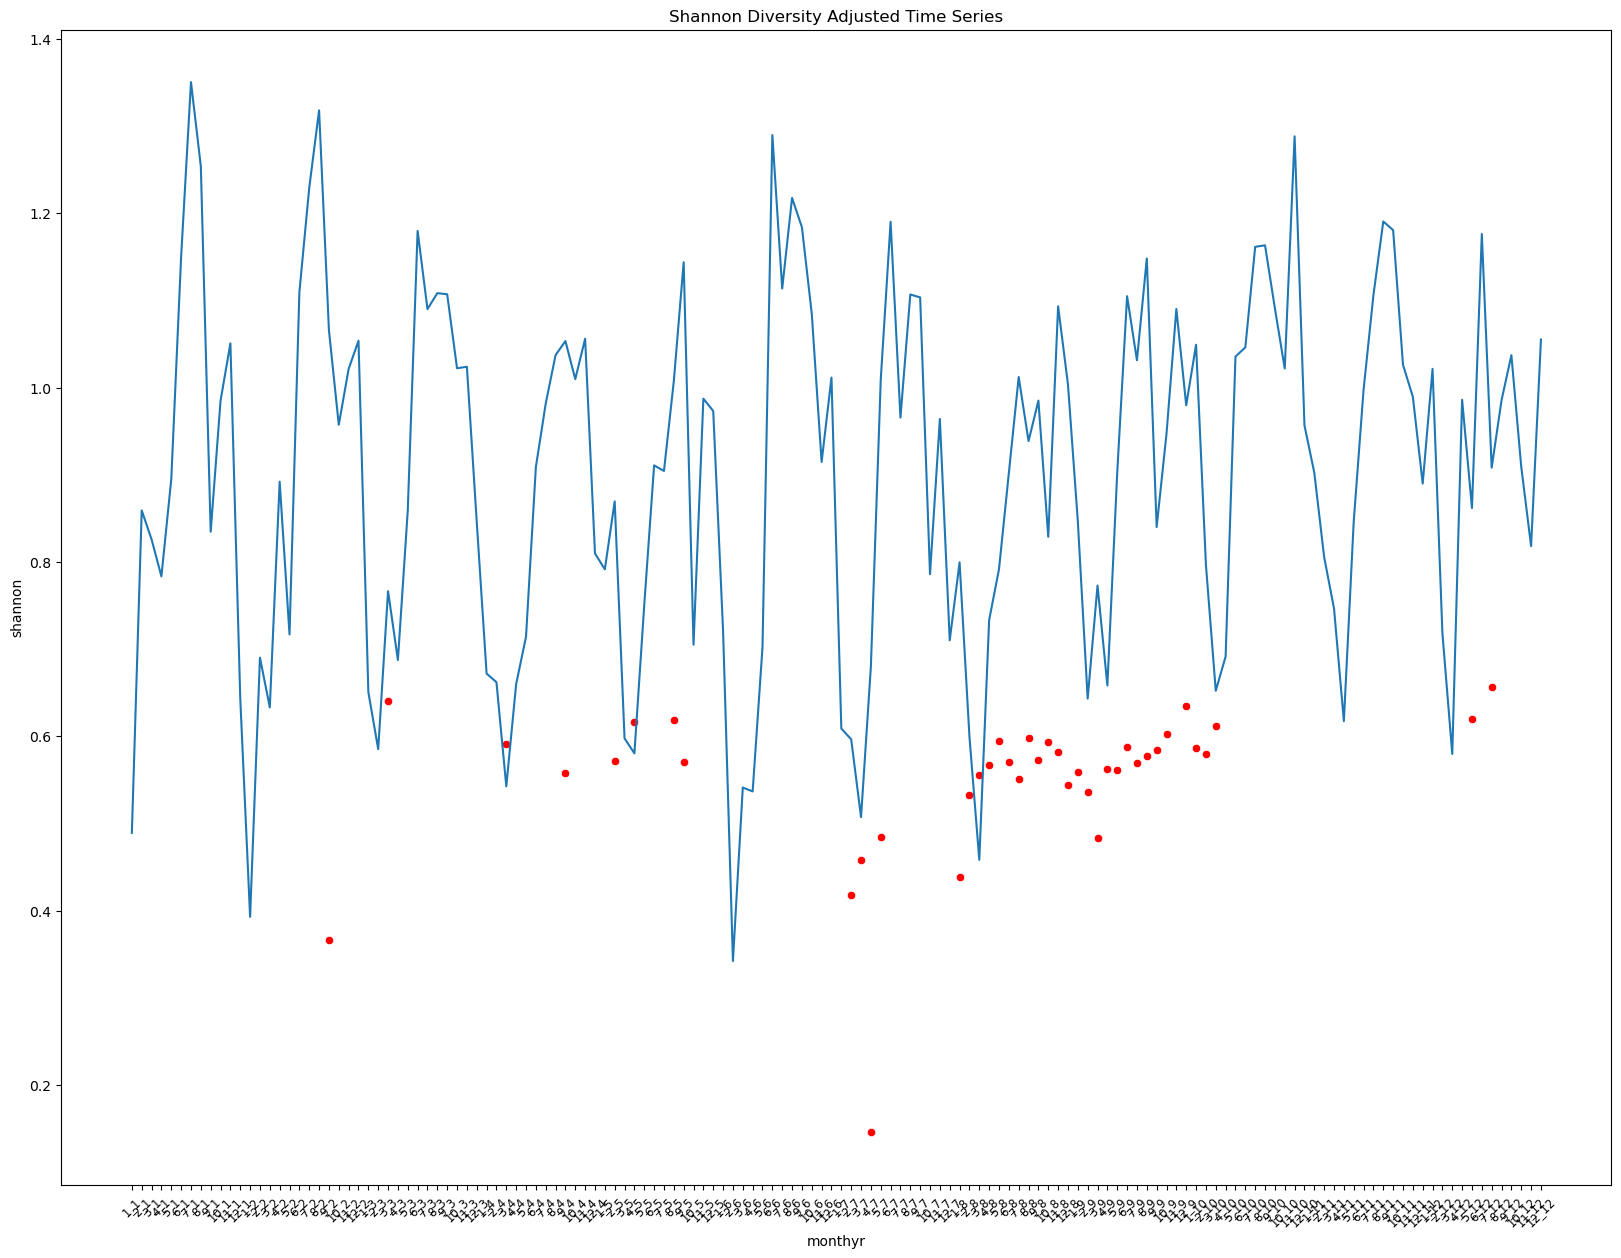

In [660]:
#plt.figure()
#sns.lineplot(x='monthyr',y='shannon',data=SDI_means_2,palette='viridis')
fig,ax=plt.subplots(figsize=(20,15))
plt.subplot()
sns.lineplot(x='monthyr',y='shannon',data=SDI_means_2,ax=ax)
plt.subplot()
sns.scatterplot(x='year_seq_month',y='ShannonDiversity', data=benX_AreaMean,color='red')
#plt.legend()
plt.xticks(rotation=45,fontsize='small')
plt.title('Shannon Diversity Adjusted Time Series')
plt.show()

In [661]:
benX_sindex['yrmon']=benX_sindex.month.astype(str)+'_'+benX_sindex.Year.astype(str)

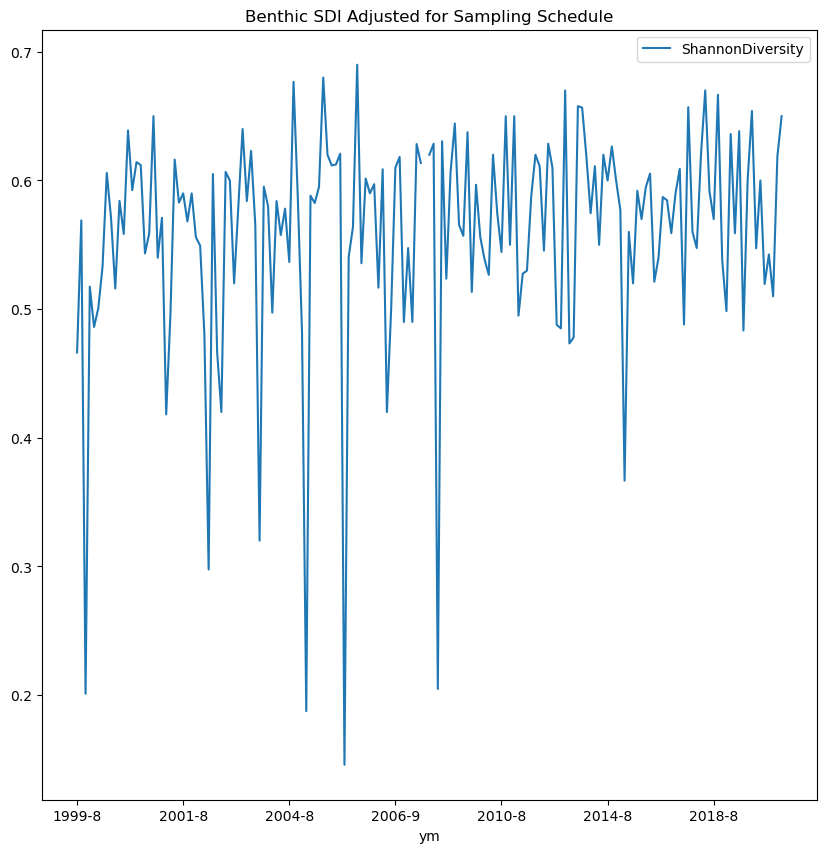

In [662]:

benX_sindex[benX_sindex.Year.isin(years)].plot(x='ym',y='ShannonDiversity',title='Benthic SDI Adjusted for Sampling Schedule',figsize=(10,10))
plt.show()

In [663]:
benX_sindex['year_seq']=benX_sindex.Year.map({
    1999:1,
    2001:2,
    2004:3,
    2006:4,
    2008:5,
    2010:6,
    2012:7,
    2014:8,
    2016:9,
    2018:10,
    2020:11,
    2022:12
    })

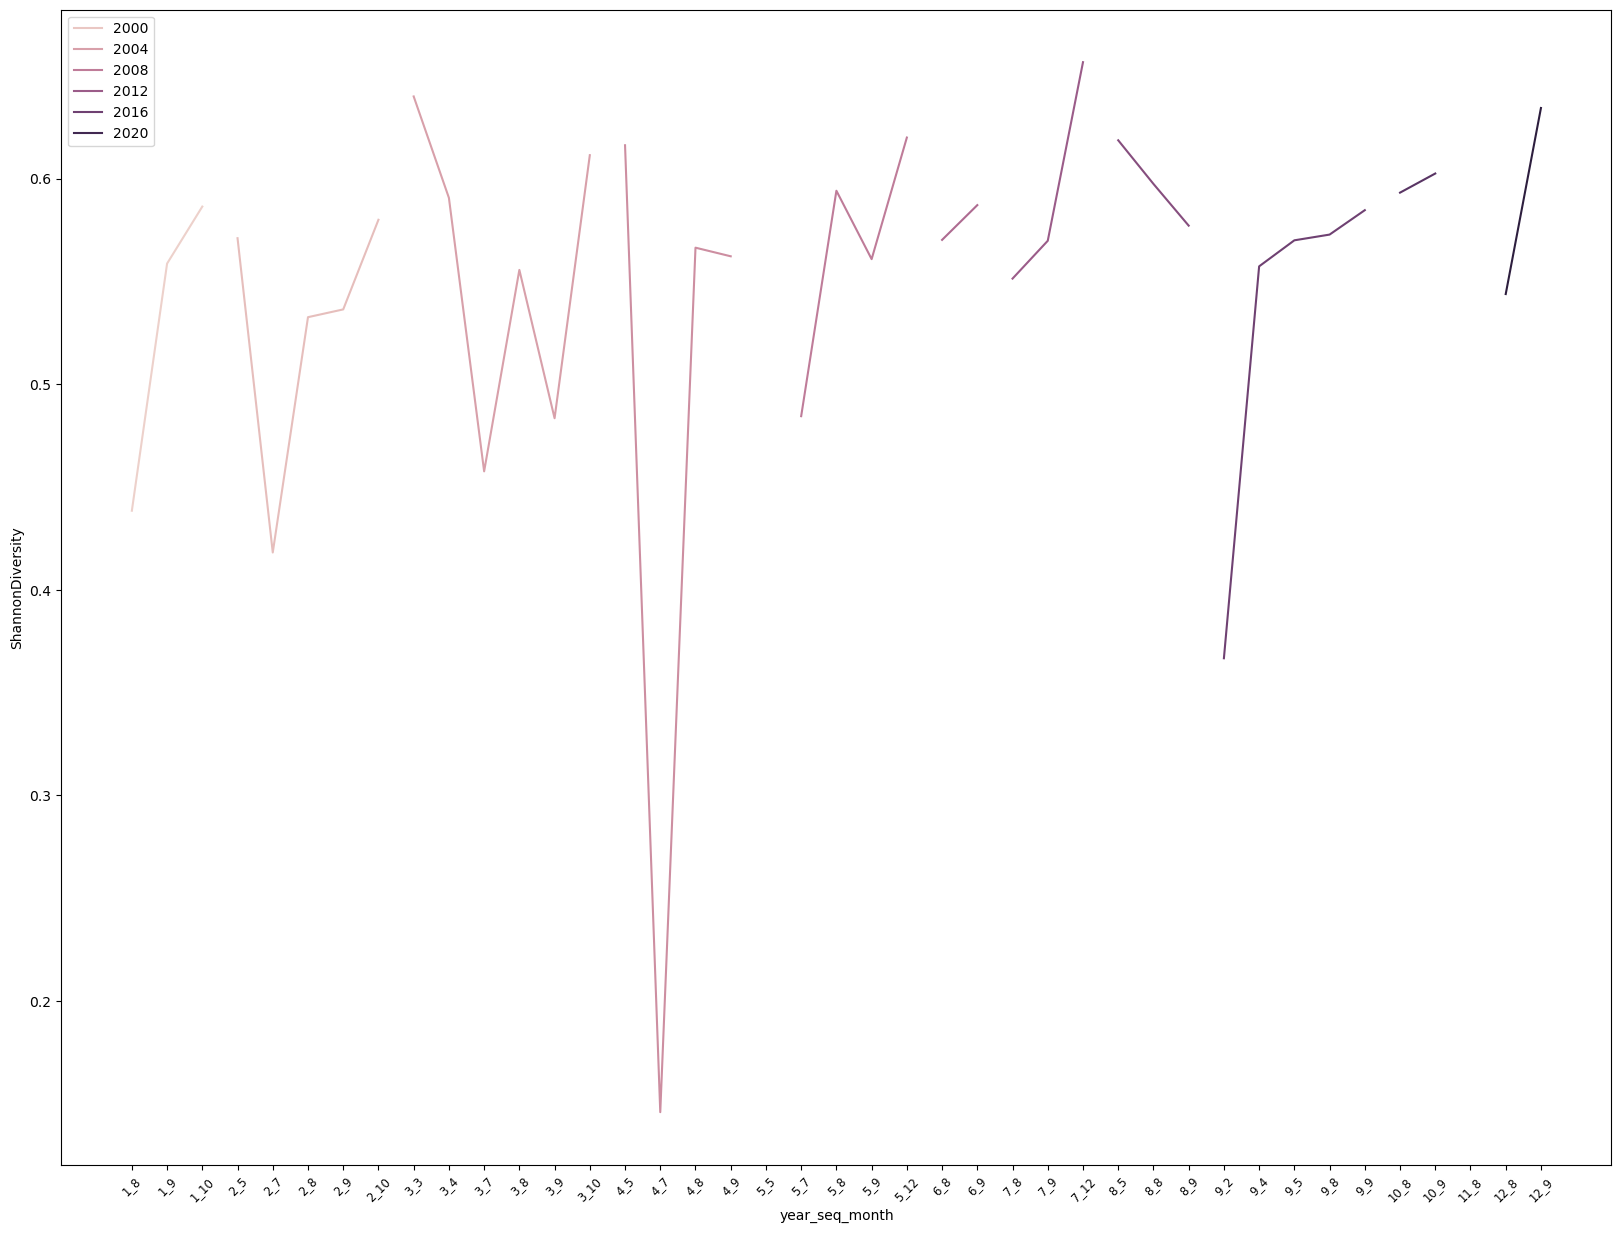

In [664]:
plt.figure(figsize=(20,15))
sns.lineplot(x='year_seq_month',y='ShannonDiversity', data=benX_AreaMean , hue='Year')
plt.legend()
plt.xticks(rotation=45,fontsize='small')
plt.show()

In [665]:
plt.figure(figsize=(20,15))
sns.lineplot(x='year_seq',y='shannon',data=SDI_means_2,palette='viridis')
plt.legend()1
plt.xticks(rotation=45,fontsize='small')
plt.show()

SyntaxError: invalid syntax (2218769775.py, line 3)

In [666]:
benX_AreaMean

Year  month year_seq_month  ShannonDiversity
0   1999      8            1_8          0.438449
1   1999      9            1_9          0.558688
2   1999     10           1_10          0.586418
3   2001      5            2_5          0.571034
4   2001      7            2_7          0.418125
5   2001      8            2_8          0.532607
6   2001      9            2_9          0.536389
7   2001     10           2_10          0.580000
8   2004      3            3_3          0.640000
9   2004      4            3_4          0.590667
10  2004      7            3_7          0.457600
11  2004      8            3_8          0.555614
12  2004      9            3_9          0.483438
13  2004     10           3_10          0.611414
14  2006      5            4_5          0.616250
15  2006      7            4_7          0.145833
16  2006      8            4_8          0.566423
17  2006      9            4_9          0.562225
18  2008      5            5_5               NaN
19  2008      7            5_7          0.484444
20  2008      8            5_8          0.594124
21  2008      9            5_9          0.560845
22  2008     12           5_12          0.620000
23  2010      8            6_8          0.570213
24  2010      9            6_9          0.587125
25  2012      8            7_8          0.551377
26  2012      9            7_9          0.569778
27  2012     12           7_12          0.656667
28  2014      5            8_5          0.618667
29  2014      8            8_8          0.597447
30  2014      9            8_9          0.577143
31  2016      2            9_2          0.366667
32  2016      4            9_4          0.557333
33  2016      5            9_5          0.570000
34  2016      8            9_8          0.572788
35  2016      9            9_9          0.584667
36  2018      8           10_8          0.593194
37  2018      9           10_9          0.602500
38  2020      8           11_8          0.581430
39  2022      8           12_8          0.543855
40  2022      9           12_9          0.634375

In [667]:
shared_months=benX_match_nekton['year_seq_month']

In [668]:
SDI_means_2

month  sgyear   shannon monthyr     ym day date_format
0        1       1  0.489115     1_1    1_1  01  2001-01-01
1        2       1  0.859081     2_1    1_2  01  2001-01-02
2        3       1  0.825866     3_1    1_3  01  2001-01-03
3        4       1  0.783379     4_1    1_4  01  2001-01-04
4        5       1  0.894913     5_1    1_5  01  2001-01-05
..     ...     ...       ...     ...    ...  ..         ...
139      8      12  0.985419    8_12   12_8  01  2012-01-08
140      9      12  1.037126    9_12   12_9  01  2012-01-09
141     10      12  0.909193   10_12  12_10  01  2012-01-10
142     11      12  0.818095   11_12  12_11  01  2012-01-11
143     12      12  1.055173   12_12  12_12  01  2012-01-12

[144 rows x 7 columns]

In [669]:
benX_AreaMean[benX_AreaMean.year_seq_month.isin(shared_months)].shape

(41, 4)

In [670]:
test=SDI_means_2.merge(benX_AreaMean[benX_AreaMean.year_seq_month.isin(shared_months)], left_on='monthyr', right_on='year_seq_month')

<Axes: xlabel='year_seq_month'>

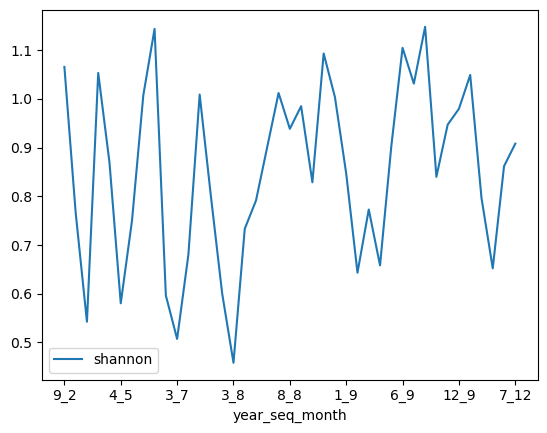

In [671]:
test.plot(x='year_seq_month',y='shannon')

In [672]:
test

month_x  sgyear   shannon monthyr    ym day date_format  Year  month_y  \
0         9       2  1.065691     9_2   2_9  01  2002-01-09  2016        2   
1         3       3  0.766389     3_3   3_3  01  2003-01-03  2004        3   
2         3       4  0.542445     3_4   4_3  01  2004-01-03  2004        4   
3         9       4  1.053323     9_4   4_9  01  2004-01-09  2016        4   
4         2       5  0.869411     2_5   5_2  01  2005-01-02  2001        5   
5         4       5  0.580332     4_5   5_4  01  2005-01-04  2006        5   
6         5       5  0.750458     5_5   5_5  01  2005-01-05  2008        5   
7         8       5  1.007306     8_5   5_8  01  2005-01-08  2014        5   
8         9       5  1.143763     9_5   5_9  01  2005-01-09  2016        5   
9         2       7  0.596418     2_7   7_2  01  2007-01-02  2001        7   
10        3       7  0.507165     3_7   7_3  01  2007-01-03  2004        7   
11        4       7  0.680163     4_7   7_4  01  2007-01-04  2006        7   
12        5       7  1.008939     5_7   7_5  01  2007-01-05  2008        7   
13        1       8  0.799493     1_8   8_1  01  2008-01-01  1999        8   
14        2       8  0.599871     2_8   8_2  01  2008-01-02  2001        8   
15        3       8  0.458201     3_8   8_3  01  2008-01-03  2004        8   
16        4       8  0.733190     4_8   8_4  01  2008-01-04  2006        8   
17        5       8  0.791543     5_8   8_5  01  2008-01-05  2008        8   
18        6       8  0.901952     6_8   8_6  01  2008-01-06  2010        8   
19        7       8  1.012086     7_8   8_7  01  2008-01-07  2012        8   
20        8       8  0.938555     8_8   8_8  01  2008-01-08  2014        8   
21        9       8  0.985010     9_8   8_9  01  2008-01-09  2016        8   
22       10       8  0.828806    10_8  8_10  01  2008-01-10  2018        8   
23       11       8  1.093262    11_8  8_11  01  2008-01-11  2020        8   
24       12       8  1.003557    12_8  8_12  01  2008-01-12  2022        8   
25        1       9  0.846645     1_9   9_1  01  2009-01-01  1999        9   
26        2       9  0.643139     2_9   9_2  01  2009-01-02  2001        9   
27        3       9  0.772867     3_9   9_3  01  2009-01-03  2004        9   
28        4       9  0.658213     4_9   9_4  01  2009-01-04  2006        9   
29        5       9  0.902600     5_9   9_5  01  2009-01-05  2008        9   
30        6       9  1.104834     6_9   9_6  01  2009-01-06  2010        9   
31        7       9  1.031336     7_9   9_7  01  2009-01-07  2012        9   
32        8       9  1.148038     8_9   9_8  01  2009-01-08  2014        9   
33        9       9  0.839977     9_9   9_9  01  2009-01-09  2016        9   
34       10       9  0.946984    10_9  9_10  01  2009-01-10  2018        9   
35       12       9  0.979694    12_9  9_12  01  2009-01-12  2022        9   
36        1      10  1.049108    1_10  10_1  01  2010-01-01  1999       10   
37        2      10  0.796672    2_10  10_2  01  2010-01-02  2001       10   
38        3      10  0.652137    3_10  10_3  01  2010-01-03  2004       10   
39        5      12  0.861776    5_12  12_5  01  2012-01-05  2008       12   
40        7      12  0.908085    7_12  12_7  01  2012-01-07  2012       12   

   year_seq_month  ShannonDiversity  
0             9_2          0.366667  
1             3_3          0.640000  
2             3_4          0.590667  
3             9_4          0.557333  
4             2_5          0.571034  
5             4_5          0.616250  
6             5_5               NaN  
7             8_5          0.618667  
8             9_5          0.570000  
9             2_7          0.418125  
10            3_7          0.457600  
11            4_7          0.145833  
12            5_7          0.484444  
13            1_8          0.438449  
14            2_8          0.532607  
15            3_8          0.555614  
16            4_8          0.566423  
17            5_8          0.594124  
18   

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\800347921.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



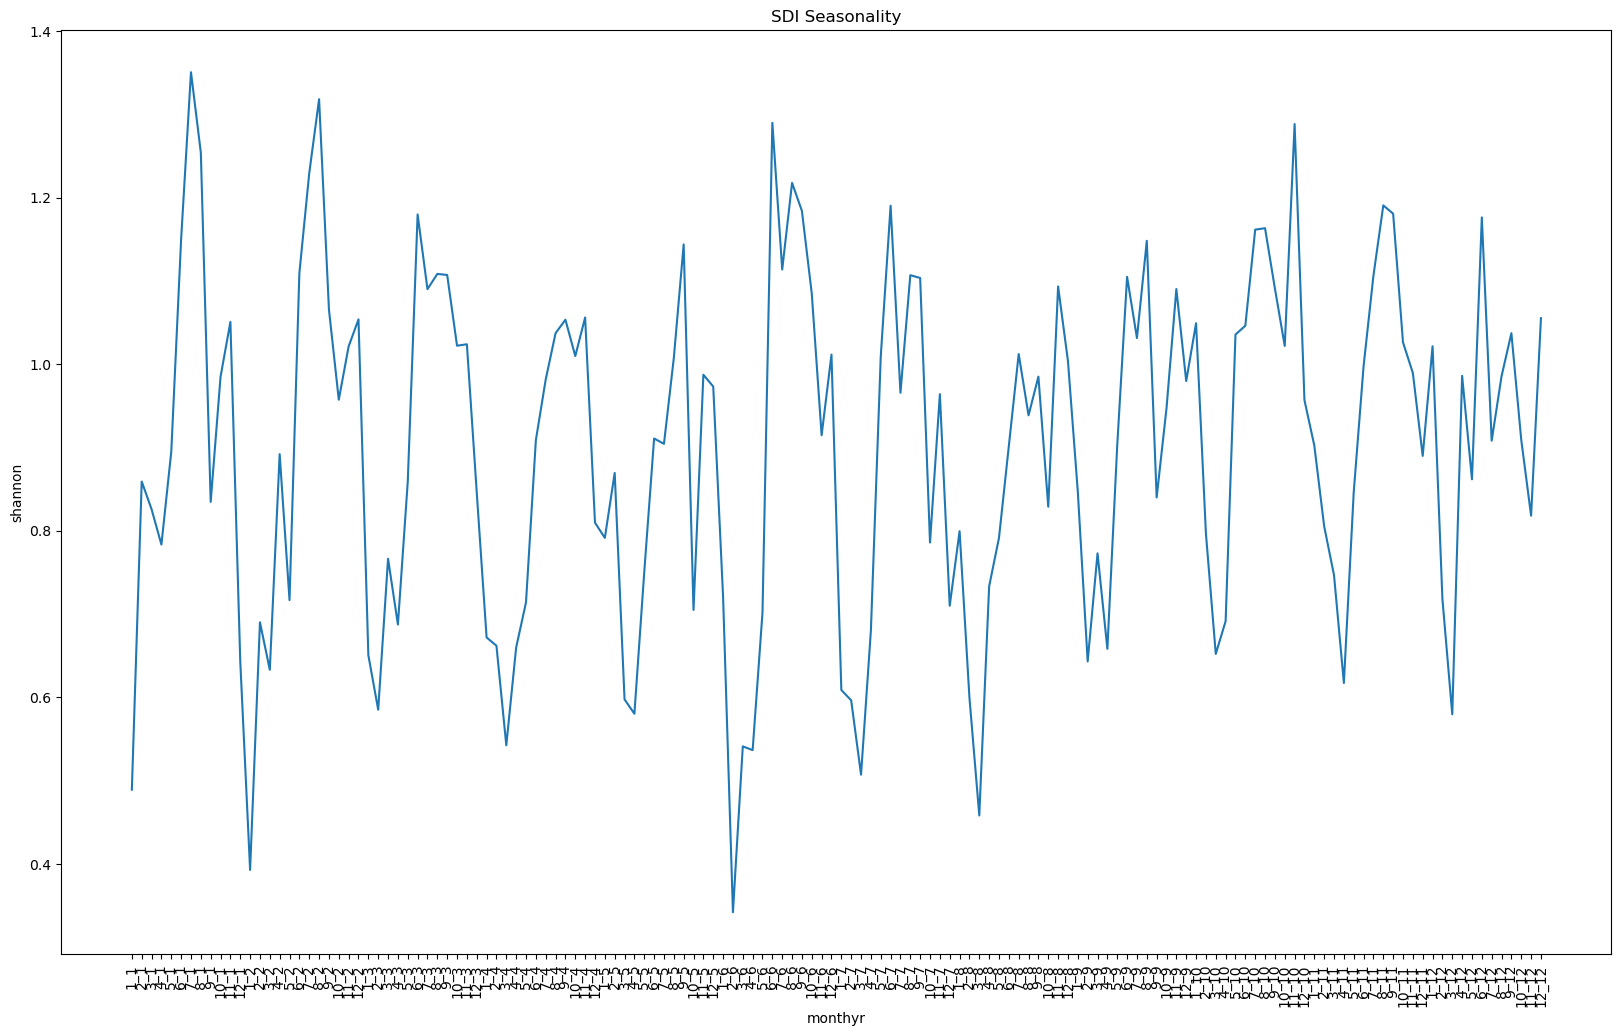

In [673]:
plt.figure(figsize=(20,12))
sns.lineplot(x='year_seq_month',y='ShannonDiversity', data=test,ax=ax)
sns.lineplot(x='monthyr',y='shannon',data=SDI_means_2,palette='viridis')
plt.xticks(rotation=90)
plt.title('SDI Seasonality')
plt.show()

In [ ]:
FIM

Reference  StartDepth  BottomVegCover  BycatchQuantity  slope  \
0     TBM1998010906         0.6             0.0              0.0    0.0   
1     TBM1998010910         0.8             0.0              0.0    0.0   
2     TBM1998010912         0.7             0.0              0.0    0.0   
3     TBM1998010914         0.9            10.0              0.0    0.0   
4     TBM1998010915         0.5             0.0              0.0    0.0   
...             ...         ...             ...              ...    ...   
4581  TBM2021120704         1.0             0.0              0.1    NaN   
4582  TBM2021120705         0.5            80.0              0.0    NaN   
4583  TBM2021120802         0.3            20.0              0.0    NaN   
4584  TBM2021120804         0.6           100.0              3.0    NaN   
4585  TBM2021120805         0.6             1.0              0.0    NaN   

      ScoreNumTaxa  ScoreShannon  ScoreTaxaSelect  ScoreTaxaBenthic  \
0                2             2                0                 0   
1                1             0                3                 1   
2                0             0                0                 0   
3                2             4                0                 2   
4                4             7                3                 4   
...            ...           ...              ...               ...   
4581             3             4                0                 3   
4582            10             9                0                 9   
4583             3             7                0                 3   
4584            10            10               10                10   
4585             3             6                0                 3   

      ScoreNumGuilds  TBNI_Score        acres  Non    HA    TH   SAV  Alg  \
0                  5          18     0.000000    1   0.0   0.0   0.0  0.0   
1                  2          14     0.000000    1   0.0   0.0   0.0  0.0   
2                  0           0     0.000000    1   0.0   0.0   0.0  0.0   
3                  2          20     0.000000    0  10.0   0.0   0.0  0.0   
4                  5          46   511.366301    1   0.0   0.0   0.0  0.0   
...              ...         ...          ...  ...   ...   ...   ...  ...   
4581               5          30     0.000000    1   0.0   0.0   0.0  0.0   
4582               8          72  2858.724318    0  64.0   8.0   8.0  0.0   
4583               8          42  1263.173174    0   0.0  20.0   0.0  0.0   
4584               8          96   533.032154    0  10.0  10.0  80.0  0.0   
4585               5          34   905.479349    0   0.0   0.5   0.5  0.0   

       RU  temperature  salinity  dissolvedO2  Unnamed: 21  month  year  gr  \
0     0.0         19.9      13.1         5.50          NaN      1  1998  20   
1     0.0         19.6      13.4         7.10          NaN      1  1998  20   
2     0.0         19.3      13.2         7.00          NaN      1  1998  20   
3     0.0         19.3      13.4         7.60          NaN      1  1998  20   
4     0.0         19.5      13.3         5.90          NaN      1  1998  20   
...   ...          ...       ...          ...          ...    ...   ...  ..   
4581  0.0         20.5      30.0         5.65          NaN     12  2021  20   
4582  0.0         21.2      26.4         6.40          NaN     12  2021  20   
4583  0.0         20.4      27.4         8.80          NaN     12  2021  20   
4584  0.0         22.4      24.2         8.70          NaN     12  2021  20   
4585  0.0         21.4      25.7         9.75          NaN     12  2021  20   

      Season TBEP_seg  sgyear  FLUCCSCODE  areas  bottom       DominantVeg  \
0     Winter      OTB  1999.0         NaN   22.0  MudSan               NaN   
1     Winter      OTB  1999.0         NaN   21.0  MudSan               NaN   
2     Winter      OTB  1999.0         NaN   21.0  MudSan               NaN   
3     Winter      OTB  1999.0         NaN   21.0  MudSan     Halodule 

In [ ]:
FIM_nn=FIM[['temperature','salinity','dissolvedO2','BottomVegCover','bottom','ScoreNumTaxa','ScoreShannon','ScoreTaxaBenthic','TBNI_Score']]

In [ ]:
bottom_dummies=pd.get_dummies(FIM_nn.bottom).astype('int')

In [ ]:
FIM_nn.drop(columns='bottom',inplace=True)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\3929509344.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
FIM_nn=pd.concat([FIM_nn,bottom_dummies],axis=1)

In [ ]:
kjs=pd.read_csv('kjeldahl.csv')
nit=pd.read_csv('nitrate.csv')
amm=pd.read_csv('ammonia.csv')

In [ ]:
kjs

Unnamed: 0          DataSourceName StationID           SampleDate  \
0           25665  EPC Water Quality Data        55  1999-12-07 00:00:00   
1           25666  EPC Water Quality Data        55  2000-07-11 00:00:00   
2           25667  EPC Water Quality Data         6  1995-10-10 00:00:00   
3           25668  EPC Water Quality Data        55  2002-06-11 00:00:00   
4           25669  EPC Water Quality Data        55  2003-04-08 00:00:00   
...           ...                     ...       ...                  ...   
16315      544103                PINELLAS        E6  2012-12-05 09:37:00   
16316      544135                PINELLAS        E6  2012-12-05 10:31:00   
16317      544161                PINELLAS        E6  2012-12-05 11:11:00   
16318      544192                PINELLAS        E6  2012-12-05 11:56:00   
16319      544254              WIN_21FLGW     59865  2022-01-19 00:00:00   

      SampleTime  ResultValue ResultUnit   Latitude  Longitude  month  year  \
0        0:00:00         0.51       mg/l  27.849166 -82.431385     12  1999   
1        0:00:00         1.08       mg/l  27.849166 -82.431385      7  2000   
2        0:00:00         0.84       mg/l  27.889443 -82.477497     10  1995   
3        0:00:00         0.92       mg/l  27.849166 -82.431385      6  2002   
4        0:00:00         0.51       mg/l  27.849166 -82.431385      4  2003   
...          ...          ...        ...        ...        ...    ...   ...   
16315    0:00:00         0.36       mg/l  27.835140 -82.586520     12  2012   
16316    0:00:00         0.32       mg/l  27.833350 -82.585210     12  2012   
16317    0:00:00         0.24       mg/l  27.811150 -82.594590     12  2012   
16318    0:00:00         0.32       mg/l  27.791200 -82.607350     12  2012   
16319    0:00:00         0.92       mg/l  27.758901 -82.428693      1  2022   

       day   DateMonth  
0        1  1999-12-01  
1        1  2000-07-01  
2        1  1995-10-01  
3        1  2002-06-01  
4        1  2003-04-01  
...    ...         ...  
16315    1  2012-12-01  
16316    1  2012-12-01  
16317    1  2012-12-01  
16318    1  2012-12-01  
16319    1  2022-01-01  

[16320 rows x 13 columns]

In [ ]:
kjs.merge

In [ ]:
os.chdir('J:\\Brainstation\\BS Git\\data\\human Imact')

In [ ]:
Nit_final=pd.read_csv('NIT_FINAL.csv')

In [ ]:
Nit_final

In [ ]:
catch_sel

month      Reference  Aca_quadricornis  Ach_lineatus  Achiridae_spp  \
0       01  TBM1998010906                 0             0              0   
1       01  TBM1998010910                 0             0              0   
2       01  TBM1998010912                 0             0              0   
3       01  TBM1998010914                 0             0              0   
4       01  TBM1998010915                 0             0              0   
...    ...            ...               ...           ...            ...   
4570    12  TBM2021120704                 0             0              0   
4571    12  TBM2021120705                 0             3              0   
4572    12  TBM2021120802                 0             0              0   
4573    12  TBM2021120804                 1             0              0   
4574    12  TBM2021120805                 0             2              0   

      Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  \
0              0             0           0              0             0   
1              0             0           0              0             0   
2              0             0           0              0             0   
3              0             0           0              0             0   
4              0             0           0              0             0   
...          ...           ...         ...            ...           ...   
4570           0             0           0              0             0   
4571           0             0           0              0             0   
4572           0             0           0              0             0   
4573           0             0           0              0             0   
4574           0             0           0              0             0   

      Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0              0             0             0             15           0   
1              0             0             0              0           0   
2              0             0             0              0           0   
3              0             0             0              0           0   
4              0             0             0              0           0   
...          ...           ...           ...            ...         ...   
4570           0             0             0              0           0   
4571           0             0             0              7           0   
4572           0             0             0              0           0   
4573           0             0             0              0           0   
4574           0             0             0              0           0   

      Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0                       0               0          0              0   
1                       0               0          0              0   
2                       0               0          0              0   
3                       0               0          0              0   
4                       0               0          0              0   
...                   ...             ...        ...            ...   
4570                    0               0          0              0   
4571                    0               0          0              0   
4572                    0               0          0              0   
4573                    0               0          0              0   
4574                    0               0          0              0   

      Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  \
0               0              0              0                0   
1               0              0              0                0   
2               0              0              0                0   
3               0              0              0                0   
4               0              0              0                0   
...           ...            

In [ ]:
"""
NP_nekton
"""

'\nNP_nekton\n'

In [ ]:
NP_nn=NP_nekton.copy()

In [ ]:
NP_nn.reset_index(names='Date',inplace=True)

In [ ]:
NP_nn.Date=NP_nn.Date.astype('int64')

In [ ]:
NP_nn

Nit      Phos   shannon
1999-01-01  0.642960  0.155000  0.489115
1999-02-01  0.516667  0.217500  0.859081
1999-03-01  0.589455  0.227500  0.825866
1999-04-01  0.621739  0.248571  0.783379
1999-05-01  0.725000  0.171818  0.894913
...              ...       ...       ...
2022-08-01  0.413314  0.121000  0.985419
2022-09-01  0.440909  0.241167  1.037126
2022-10-01  0.349529  0.376714  0.909193
2022-11-01  0.515480  0.114714  0.818095
2022-12-01  0.402571  0.157556  1.055173

[144 rows x 3 columns]

In [ ]:
# SDI = SHANNON DIVERSITY INDEX
# Get base info for SDI joining to separate anthor
print(f'head: {shannon[:10]} \n LENGTH OF SDI {len(shannon)}')

head: 0    0.362211
1   -0.000000
2   -0.000000
3    0.693147
4    1.162226
5    0.793730
6   -0.000000
7   -0.000000
8   -0.000000
9    1.098612
dtype: float64 
 LENGTH OF SDI 4575


In [ ]:
NP_nn.iloc[:,:-1]

Nit      Phos
1999-01-01  0.642960  0.155000
1999-02-01  0.516667  0.217500
1999-03-01  0.589455  0.227500
1999-04-01  0.621739  0.248571
1999-05-01  0.725000  0.171818
...              ...       ...
2022-08-01  0.413314  0.121000
2022-09-01  0.440909  0.241167
2022-10-01  0.349529  0.376714
2022-11-01  0.515480  0.114714
2022-12-01  0.402571  0.157556

[144 rows x 2 columns]

In [ ]:
model=Sequential()

In [ ]:
freq_nn.iloc[:,:-1].values()

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
# Split the data into features (X) and target variable (y)
X = NP_nn.iloc[:, :-1].values  # Select all columns except the last one
y = NP_nn.iloc[:, -1].values  # Select the last column as the target

In [ ]:
# Split the data into features (X) and target variable (y)
X = freq_nn.iloc[:, :-1].values  # Select all columns except the last one
y = freq_nn.iloc[:, -1].values  # Select the last column as the target

# Normalize data 

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)) 

# Reshape the data for LSTM input (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Create the LSTM model
model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))  # First LSTM layer
model.add(LSTM(64))  # Second LSTM layer
model.add(Dense(1))  # Output layer with 1 neuron for your target

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model

In [ ]:
TBNI=FIM_nn.TBNI_Score

In [ ]:
FIM_nn2.drop(columns='slope',inplace=True)

In [ ]:
FIM_nn2['TBNI']=TBNI

In [ ]:
FIM_nn2.isna().sum()

StartDepth             0
BottomVegCover        27
BycatchQuantity        1
slope               3388
ScoreNumTaxa           0
ScoreShannon           0
ScoreTaxaSelect        0
ScoreTaxaBenthic       0
ScoreNumGuilds         0
acres                  0
Non                    0
HA                     0
TH                     0
SAV                    0
Alg                    0
RU                     0
temperature            1
salinity               6
dissolvedO2           69
month                  0
year                   0
gr                     0
sgyear                11
areas                 11
TBNI                   0
dtype: int64

In [ ]:
FIM_nn.iloc[:, -1]

0       18
1       14
2        0
3       20
4       46
        ..
4581    30
4582    72
4583    42
4584    96
4585    34
Name: TBNI, Length: 4586, dtype: int64

In [ ]:
FIM_nn2.drop(columns=FIM_nn2.columns[[19,24]],inplace=True)

In [ ]:
FIM_nn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4586 entries, 0 to 4585
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StartDepth        4586 non-null   float64
 1   BottomVegCover    4559 non-null   float64
 2   BycatchQuantity   4585 non-null   float64
 3   slope             1198 non-null   float64
 4   ScoreNumTaxa      4586 non-null   int64  
 5   ScoreShannon      4586 non-null   int64  
 6   ScoreTaxaSelect   4586 non-null   int64  
 7   ScoreTaxaBenthic  4586 non-null   int64  
 8   ScoreNumGuilds    4586 non-null   int64  
 9   acres             4586 non-null   float64
 10  Non               4586 non-null   int64  
 11  HA                4586 non-null   float64
 12  TH                4586 non-null   float64
 13  SAV               4586 non-null   float64
 14  Alg               4586 non-null   float64
 15  RU                4586 non-null   float64
 16  temperature       4585 non-null   float64


In [ ]:
FIM_nn2=FIM.drop(columns=FIM.columns[[0,25,26,30,31,32,33,34,35,36,37]])

In [ ]:
NP_nn

Nit      Phos   shannon
1999-01-01  0.642960  0.155000  0.489115
1999-02-01  0.516667  0.217500  0.859081
1999-03-01  0.589455  0.227500  0.825866
1999-04-01  0.621739  0.248571  0.783379
1999-05-01  0.725000  0.171818  0.894913
...              ...       ...       ...
2022-08-01  0.413314  0.121000  0.985419
2022-09-01  0.440909  0.241167  1.037126
2022-10-01  0.349529  0.376714  0.909193
2022-11-01  0.515480  0.114714  0.818095
2022-12-01  0.402571  0.157556  1.055173

[144 rows x 3 columns]

In [ ]:
# Establish dataset to be used for processing in NN
# Table must be formatted with y as last column

# This could be done with multiple tables in a loop -> 

In [ ]:
temp_nn_table=
X
y


In [ ]:
# Perform Test Train Split For Whatever Data will be passed through NN

In [ ]:
# Separate features (X) and target (y)
X = FIM_nn2.iloc[:, :-1].values  # Selects all columns except the last one
y = FIM_nn2.iloc[:, -1].values   # Selects the last column as the target

# Normalize data 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)) 

# Reshape for LSTM (samples, timesteps, features)
# Assuming each row represents a single timestep
X = X.reshape(X.shape[0], 1, X.shape[1]) 

# Create the model
model = Sequential()
model.add(LSTM(8, input_shape=(X.shape[1], X.shape[2]),activation='relu', return_sequences=True))
#model.add(LSTM(128, return_sequences=True))  # Added another LSTM layer 
#model.add(LSTM(8, 
#               input_shape=(X.shape[1], X.shape[2]), 
#               return_sequences=True, 
#               activation='relu'))
model.add(LSTM(3,activation='relu'))  # Keep this layer
model.add(Dense(1))
# Another LSTM layer with fewer neurons

# Compile the model
model.compile(loss='mse', optimizer='adam',metrics=['accuracy']) 

# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X, y) 
print('Loss:', loss)
model.summary()

Epoch 1/100


C:\Users\Ajax\miniconda3\envs\bs\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0963 - loss: nan - val_accuracy: 0.0969 - val_loss: nan
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.0880 - loss: nan - val_accuracy: 0.0969 - val_loss: nan
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.0899 - loss: nan - val_accuracy: 0.0969 - val_loss: nan
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0886 - loss: nan - val_accuracy: 0.0969 - val_loss: nan
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.0945 - loss: nan - val_accuracy: 0.0969 - val_loss: nan
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.0930 - loss: nan - val_accuracy: 0.0969 - val_loss: nan
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.0919 - loss: nan - val_accuracy: 0.0969 - val_loss: nan
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0939 - loss: nan - val_accuracy: 0.0969 - val_loss: nan
Epoch 9/100
115/11

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_113 (LSTM)                      │ (None, 1, 8)                │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_114 (LSTM)                      │ (None, 3)                   │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,614 (14.12 KB)

 Trainable params: 1,204 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,410 (9.42 KB)

In [ ]:
test=model.fit(X,y,epochs=100,batch_size=10,validation_split=0.15)
loss=model.evaluate(X,y)
print('Loss: ',loss)

Epoch 1/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.0891 - loss: nan - val_accuracy: 0.1105 - val_loss: nan
Epoch 2/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.0886 - loss: nan - val_accuracy: 0.1105 - val_loss: nan
Epoch 3/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.0828 - loss: nan - val_accuracy: 0.1105 - val_loss: nan
Epoch 4/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.0848 - loss: nan - val_accuracy: 0.1105 - val_loss: nan
Epoch 5/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.0884 - loss: nan - val_accuracy: 0.1105 - val_loss: nan
Epoch 6/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.0874 - loss: nan - val_accuracy: 0.1105 - val_loss: nan
Epoch 7/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.0839 - loss: nan - val_accuracy: 0.1105 - val_loss: nan
Epoch 8/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.0905 - loss: nan - val_accuracy: 0.1105 - val_loss: nan


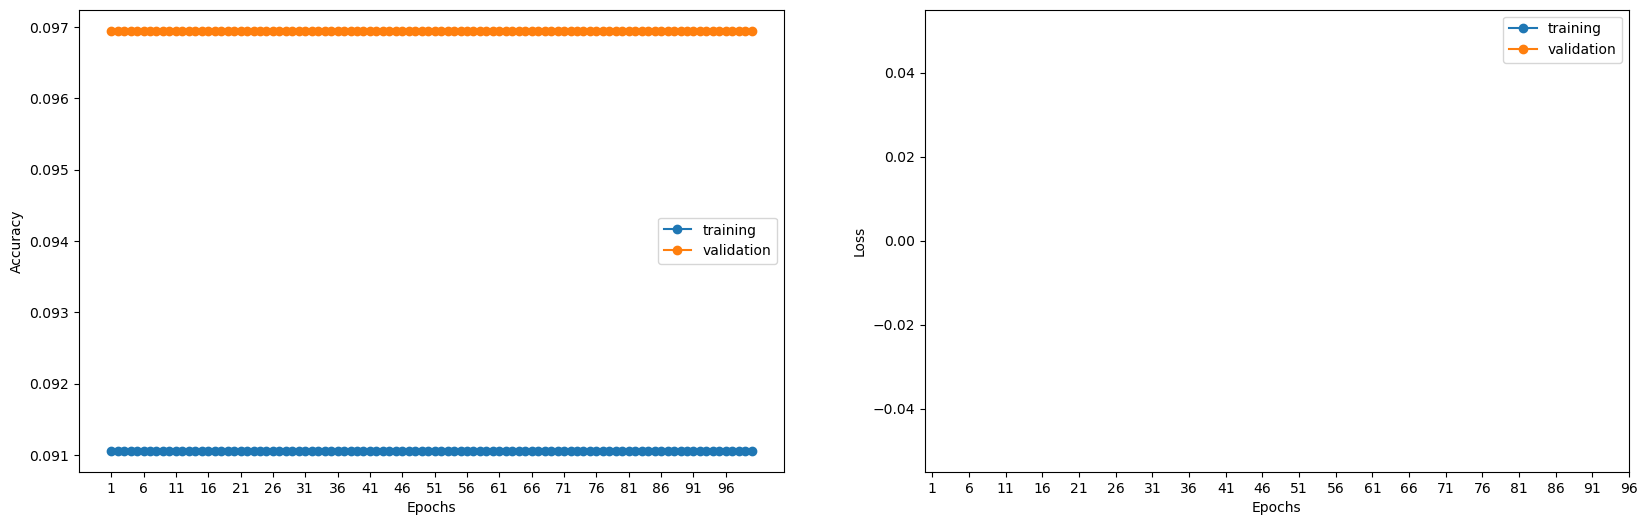

In [ ]:
epochs = range(1, 101)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["accuracy"], label="training", marker="o")
plt.plot(epochs, history.history["val_accuracy"], label="validation", marker="o")
plt.xlabel("Epochs")
plt.xticks(epochs[::5])
plt.ylabel("Accuracy")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, history.history["loss"], label="training", marker="o")
plt.plot(epochs, history.history["val_loss"], label="validation", marker="o")
plt.xlabel("Epochs")
plt.xticks(epochs[::5])
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
freq.head(5)

Aca_quadricornis  Ach_lineatus  Achiridae_spp  Adi_xenica  Aet_narinari  \
0               0.0           0.0            0.0         0.0           0.0   
1               0.0           0.0            0.0         0.0           0.0   
2               0.0           0.0            0.0         0.0           0.0   
3               0.0           0.0            0.0         0.0           0.0   
4               0.0           0.0            0.0         0.0           0.0   

   Albula_spp  Alu_schoepfii  Ana_criniger  Anc_cubana  Anc_hepsetus  \
0         0.0            0.0           0.0         0.0           0.0   
1         0.0            0.0           0.0         0.0           0.0   
2         0.0            0.0           0.0         0.0           0.0   
3         0.0            0.0           0.0         0.0           0.0   
4         0.0            0.0           0.0         0.0           0.0   

   Anc_lyolepis  Anc_mitchilli  Anchoa_spp  Arc_probatocephalus  \
0           0.0       0.882353         0.0                  0.0   
1           0.0       0.000000         0.0                  0.0   
2           0.0       0.000000         0.0                  0.0   
3           0.0       0.000000         0.0                  0.0   
4           0.0       0.000000         0.0                  0.0   

   Argopecten_spp  Ari_felis  Ast_y_graecum  Bag_marinus  Bai_chrysoura  \
0             0.0        0.0            0.0          0.0            0.0   
1             0.0        0.0            0.0          0.0            0.0   
2             0.0        0.0            0.0          0.0            0.0   
3             0.0        0.0            0.0          0.0            0.0   
4             0.0        0.0            0.0          0.0            0.0   

   Bat_soporator  Bathygobius_spp  Brevoortia_spp  Cal_arctifrons  \
0            0.0              0.0             0.0             0.0   
1            0.0              0.0             0.0             0.0   
2            0.0              0.0             0.0             0.0   
3            0.0              0.0             0.0             0.0   
4            0.0              0.0             0.0             0.0   

   Cal_ornatus  Cal_penna  Cal_sapidus  Cal_similis  Calamus_spp  \
0          0.0        0.0          0.0          0.0          0.0   
1          0.0        0.0          0.0          0.0          0.0   
2          0.0        0.0          0.0          0.0          0.0   
3          0.0        0.0          0.0          0.0          0.0   
4          0.0        0.0          0.0          0.0          0.0   

   Callinectes_spp  Car_hippos  Car_leucas  Car_limbatus  Cen_striata  \
0              0.0         0.0         0.0           0.0          0.0   
1              0.0         0.0         0.0           0.0          0.0   
2              0.0         0.0         0.0           0.0          0.0   
3              0.0         0.0         0.0           0.0          0.0   
4              0.0         0.0         0.0           0.0          0.0   

   Cen_undecimalis  Cha_faber  Cha_saburrae  Chi_schoepfii  Chl_chrysurus  \
0              0.0        0.0           0.0            0.0            0.0   
1              0.0        0.0           0.0            0.0            0.0   
2              0.0        0.0           0.0            0.0            0.0   
3              0.0        0.0           0.0            0.0            0.0   
4              0.0        0.0           0.0            0.0            0.0   

   Cit_macrops  Clupeidae_spp  Cte_boleosoma  Cte_smaragdus  Cyn_arenarius  \
0          0.0            0.0            0.0            0.0            0.0   
1          0.0            0.0            0.0            0.0            0.0   
2          0.0            0.0            0.0            0.0            0.0   
3          0.0            0.0            0.0            0.0            0.0   
4          0.0            0.0            0.0            0.0            0.0   

   Cyn_nebulosus  Cyp_variegatus  Dac_moorei  Dactyl

In [ ]:
freq.shape

(4575, 168)

In [ ]:
freq_nn=freq.copy()

In [ ]:
freq_nn['sdi']=shannon

In [ ]:
##NP_match

# Benthic with missing values

In [ ]:
# NP_means

In [ ]:
os.chdir('J:\\Brainstation\\Capstone Git\\data\\PossibleDataSources\\Benthic Index\\OG_Results')

In [ ]:
benthic_base=pd.read_csv('Benthic_BioDataSpreadsheet_ActualValuesCommunityStats2.csv',encoding='cp1252', low_memory=False)

In [ ]:
benthic_base.head(4)

In [ ]:
benthic_base['month']=pd.to_datetime(benthic_base.SampleTime,format='mixed').dt.month

In [ ]:
# Determining which columns to keep
# 3,4,6,227,6,10,11,217,219,220,221
counter=0
for x in benthic_base.columns:
    print(f'[{counter}]: {x}')
    counter+=1

In [ ]:
benthic=benthic_base.iloc[:,[3,4,6,227,10,11,217,219,220,221]]

In [ ]:
benthic['date_format']=pd.to_datetime(benthic.Year.astype(str)+'-'+benthic.month.astype(str)+'-01')

In [ ]:
benthic.info()

In [ ]:
benthic.head(5)

In [ ]:
# Get subset for Hillsborough and Middle Tampa Bay
benthic_MTBHB=benthic[benthic.AreaAbbr.isin(['MTB','HB'])]

In [ ]:
benthic_mean=benthic_MTBHB.groupby('date_format')[['SpeciesRichness','AdjCountAbundance','ShannonDiversity']].mean()

In [ ]:
benthic_mean.index.name=''

In [ ]:
benthic_mean.rename(columns={
    'SpeciesRichness':'benthic_SpeciesRichness',
    'AdjCountAbundance':'benthic_AdjCountAbundance',
    'ShannonDiversity':'benthic_shannon'
},inplace=True)

In [ ]:
benthic_mean.shape

In [ ]:
benthic_mean.sort_index(inplace=True)

In [ ]:
fig,ax= plt.subplots(figsize=(10,10))
plt.gca()
sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_AdjCountAbundance',label='Abundance Index',ax=ax,color='blue',alpha=0.5,linestyle='--',linewidth=3)
plt.legend()
plt.gca()
ax1=ax.twinx()
sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_SpeciesRichness',label='Species Richness',ax=ax1,color='green',alpha=0.5,linewidth=3)
plt.title('Benthic Species Abundance and Richness')
plt.xlabel('Year',fontsize='x-large')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_shannon',label='Shannon Diversity Index')
#sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_AdjCountAbundance',label='Abundance Index')
#sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_SpeciesRichness',label='Species Richness')
plt.tight_layout()

In [ ]:
benthic_mean

In [ ]:
benthic

In [ ]:
ftest=pd.DataFrame()
ftest=benthic.groupby(['Year','AreaName']).month.agg(['min','max'])

In [ ]:
ftest.hist()

In [ ]:
benthic_corr=benthic.iloc[:,[2,3,4,5,6.7,8,9]]

In [ ]:
benthic_corr

In [ ]:
benthic_corr.corr()

In [767]:
corr=benthic_corr.drop(columns='ShannonDiversity').corr()
mask=np.triu(corr)
plt.figure(figsize=(20,15))
sns.heatmap(corr.round(2), vmax=1,vmin=-1,center=0,cmap='coolwarm',mask=mask, annot=True)
plt.show

NameError: name 'benthic_corr' is not defined

In [ ]:
corr=benthic_corr.corr()
mask=np.triu(corr)
plt.figure(figsize=(20,15))
sns.heatmap(corr.round(2), vmax=1,vmin=-1,center=0,cmap='coolwarm',mask=mask, annot=True)
plt.show

In [ ]:
benthic_corr.isna().value_counts()

In [ ]:
benthic_corr.dropna(inplace=True)

In [ ]:
benthic_corr.shape

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=benthic_corr.Year,y=benthic_corr.ShannonDiversity)
plt.title('')

#  Benth_LinReg

# Neural Net Processing

In [ ]:
sns.scatterplot(x=benthic_corr.AdjCountAbundance,y=benthic_corr.ShannonDiversity)

In [ ]:
benthic_corr.drop(columns='ShannonDiversity')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(benthic_corr.drop(columns='ShannonDiversity'), benthic_corr.ShannonDiversity, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
LinReg_benthic=LinearRegression()
LinReg_benthic.fit(X_train,y_train)

In [ ]:
LinReg_benthic.score(X_train,y_train)

In [ ]:
LinReg_benthic.score(X_test,y_test)

In [ ]:
# L1
myLasso_benthic=Lasso()
# L2
myRidge_benthic=Ridge()

In [ ]:
myLasso_benthic.fit(X_train,y_train)

In [ ]:
myRidge_benthic.fit(X_train,y_train)

In [ ]:
print(f"The testing R^2 of Lasso Regression is: {myLasso_benthic.score(X_test, y_test)}")
print(f"The testing R^2 of Ridge Regression is: {myRidge_benthic.score(X_test, y_test)}")

In [ ]:
from sklearn.feature_selection import f_regression #evalution metric, because we are predicting a continuous variable

In [ ]:
myRidge_benthic.coef_

In [ ]:
train_scores

In [ ]:
benthic_mean

In [ ]:
for i in benthic_corr.columns:
    print(i)
    benthic_corr[i].hist()
    plt.show()

In [ ]:
fig,ax= plt.subplots(figsize=(5,5))
plt.gca()
sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_AdjCountAbundance',label='Abundance Index',ax=ax,color='blue',alpha=0.5,linestyle='--',linewidth=3)
plt.legend()
plt.gca()
ax1=ax.twinx()
sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_SpeciesRichness',label='Species Richness',ax=ax1,color='green',alpha=0.5,linewidth=3)
plt.title('Benthic Species Abundance and Richness')
plt.xlabel('Year',fontsize='x-large')
plt.legend()
plt.show()

In [ ]:
# Going to test out the prophet feature.
from prophet import Prophet

In [ ]:
# Resetting index to pull dates out of index so that it can be used in the prophet model
benthic_mean_resetindex=benthic_mean.reset_index(names='date')

In [ ]:
print(benthic_mean_resetindex.shape)
benthic_mean_resetindex.head(5)

In [ ]:
prophetdf_1=pd.DataFrame()
prophetdf_1['ds']=benthic_mean_resetindex.date
prophetdf_1['y']=benthic_mean_resetindex.benthic_shannon

In [ ]:
print('shape: ',prophetdf_1.shape)
prophetdf_1

In [ ]:
prophetdf_1

In [ ]:
benthic_prophet=Prophet()

In [ ]:
benthic_prophet.fit(prophetdf_1)

In [ ]:
plt.figure(figsize=(19,5))
sns.lineplot(x='ds',y='y',data=prophetdf_1)
plt.xticks(prophetdf_1['ds'],rotation=90,fontsize='small')
plt.show()

In [ ]:
future = benthic_prophet.make_future_dataframe(periods=24)
future.info()
future.tail(10)

In [ ]:
forecast=benthic_prophet.predict(future)

In [ ]:
forecast.tail()

In [ ]:
yearly=pd.DataFrame()

for x in range(2022,2026):

In [ ]:
sns.lineplot(x='ds',y='yearly',data=yearly)

In [ ]:
fig1=benthic_prophet.plot(forecast)

In [2]:
decomposition_N

NameError: name 'decomposition_N' is not defined

In [3]:
decomposition_N=seasonal_decompose(decomp_N,model='multiplicative')
decomposition_P=seasonal_decompose(decomp_P,model='multiplicative')

NameError: name 'seasonal_decompose' is not defined

In [ ]:
decomp_P['seasonal']=decomposition_P.seasonal
decomp_P['trend']=decomposition_P.trend
decomp_P['residual']=decomposition_P.resid

In [ ]:
decomp_N['seasonal']=decomposition_N.seasonal
decomp_N['trend']=decomposition_N.trend
decomp_N['residual']=decomposition_N.resid

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#### Population and Development

In [ ]:
os.chdir()

##### Scrap

In [ ]:
os.chdir('J:\\Brainstation\\BS Git\\human Imact\\MarineTraffic')

In [ ]:
dem = pd.read_csv('dfdemographics.csv')

In [ ]:
dem

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
#sns.lineplot(x='year',y='percentchange_unit',data=dem,label='Change in contruction rate',ax=ax)
#ax1=ax.twinx()
sns.lineplot(x='year',y='percent_change',data=dem,label='Change in population growth rate')
ax1=ax.twinx()
plt.title('Population Growth Rate')
#sns.lineplot(x='year',y='percent_change',data=dem,label='Change in contruction rate',ax=ax1,color='black')
#sns.lineplot(x='year',y='population',data=dem,label='Change in contruction rate',ax=ax)

In [ ]:
NP_mean

In [ ]:
Python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import   
 LSTM, Dense

# Assuming your data is in a NumPy array called 'data' with shape (num_samples, num_timesteps, num_features)

model = Sequential()
model.add(LSTM(units=64, input_shape=(num_timesteps, num_features)))
model.add(Dense(1))  # Assuming you're predicting a single value

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(data, labels, epochs=10, batch_size=32)